<a href="https://colab.research.google.com/github/GyeongHwan-Jang/bootproject/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 확인 및 전처리

In [1]:
# 패키지 호출
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 호출
data = pd.read_csv("/content/drive/MyDrive/python file/boostcamp/data/vgames2.csv", index_col = 0)
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [3]:
# 결측치 확인
data.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [4]:
# 결측치 처리 방법을 결정하기 위해 결측치가 포함된 내용 확인
data[data.isnull().any(axis = 1)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
32,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
51,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
274,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
...,...,...,...,...,...,...,...,...,...
16426,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0
16432,Cars: Mater-National Championship,X360,2007.0,NaN,THQ,0.13,0,0,0.01
16433,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01
16556,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0,0.03,0,0.01


**결측치를 채우기에는 범주형 데이터들임으로 선형 관계가 없는 결측치들을 채우는건 불가능하다고 판단하여 제거하도록 결정**

In [5]:
# 결측치 제거
data = data.dropna()
data = data.reset_index(drop = True)

# 결측치 확인
data.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [6]:
# 데이터의 형태 확인 
data.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [7]:
# 데이터의 단위계를 통일 시키고 숫자형으로 바꿔주는 함수
def ToNumeric(a):
  if "K" in a:
    a = a.replace("K", "")
    return float(a)*1e-3
  elif "M" in a:
    a = a.replace("M", "")
    return float(a)
  else :
    return float(a)

In [8]:
# 데이터가 수치형 데이터들로 변환
data.iloc[:,5:] = data.iloc[:,5:].applymap(ToNumeric)
data.dtypes # 데이터를 분석하기 좋은 데이터로 변형

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [9]:
# 전처리 전 년도 데이터
print(set(data["Year"]))

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 86.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 97.0, 96.0, 98.0, 95.0, 2017.0, 2020.0, 94.0}


In [10]:
# 각 형태가 다른 년도를 같은 형식으로 전처리
for idx, year in enumerate(data["Year"]):
  if year < 10:
    data.iloc[idx, 2] = year + 2000
  elif year < 100:
    temp = year + 2000
    if temp <= 2022 :
      data.iloc[idx, 2] = temp
    else :
      data.iloc[idx, 2] = year + 1900

In [11]:
# 전처리 후 년도 데이터
data["Year"] = data["Year"].astype(int)
print(set(data["Year"]))

{1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2020}


# EDA(데이터 분석)

## 각 column별 분포 분석

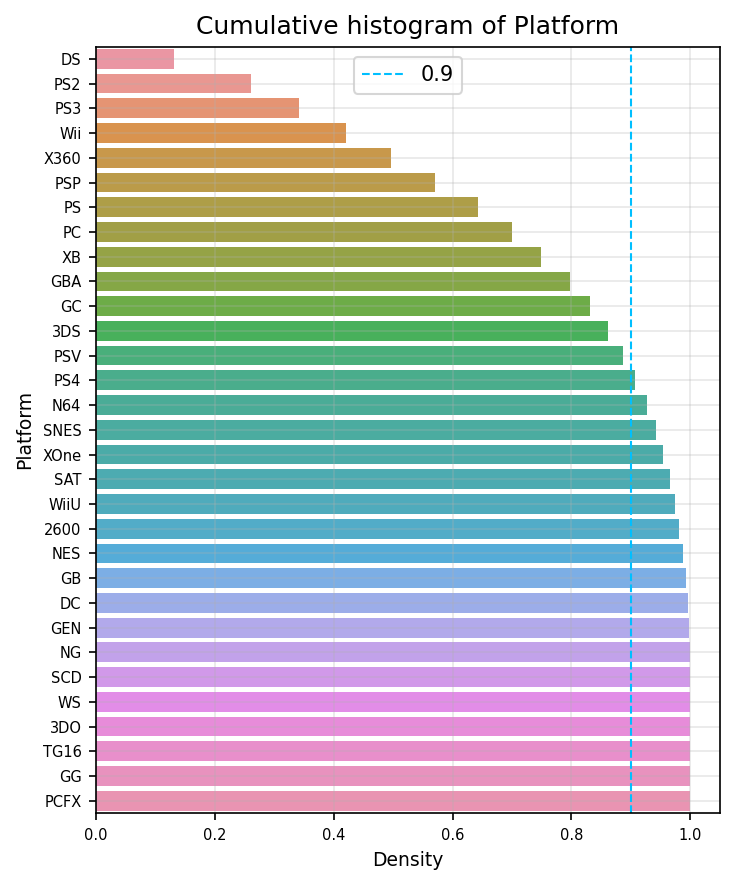

In [12]:
# 데이터에서 platform의 분포를 확인
platform_hist = data["Platform"].value_counts().sort_values(ascending=False)
cul_platform_hist = np.cumsum(platform_hist) # 데이터가 너무 많으므로 90%의 백분위를 차지하는 platform만 추출하기 위한 전처리

# 데이터 시각화
plt.figure(figsize = (5,6))
plt.gcf().set_dpi(150)
plt.title("Cumulative histogram of Platform")
sns.barplot(x = cul_platform_hist.values/cul_platform_hist.values[-1], y = cul_platform_hist.index)
plt.axvline(0.9, lw = 1, ls = "--", c= "deepskyblue", label = "0.9")
plt.xlabel("Density", fontsize = 9)
plt.ylabel("Platform", fontsize = 9)
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 7)
plt.grid(alpha = 0.3)
plt.legend(loc = "best")
plt.tight_layout()
plt.show()

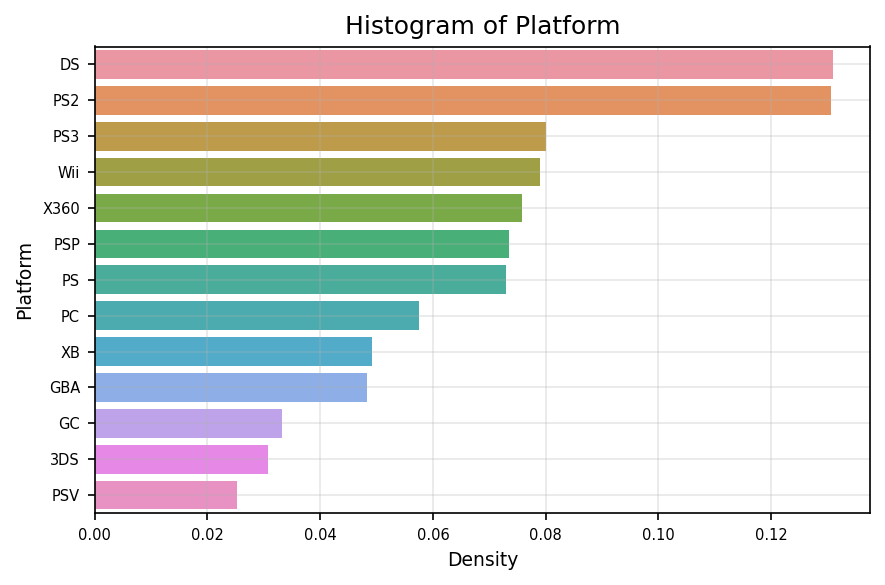

In [13]:
# 위 전처리에 의해서 90%의 백분위에 해당하는 platform만 추려서 시장의 데이터를 비교
platform_90 = len(cul_platform_hist[cul_platform_hist/cul_platform_hist[-1] < 0.9])
plt.figure()
plt.gcf().set_dpi(150)
plt.title("Histogram of Platform")
sns.barplot(x = (platform_hist.values/platform_hist.values.sum())[:platform_90], y = platform_hist.index[:platform_90])
plt.xlabel("Density", fontsize = 9)
plt.ylabel("Platform", fontsize = 9)
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 7)
plt.grid(alpha = 0.3)
plt.tight_layout()
plt.show()

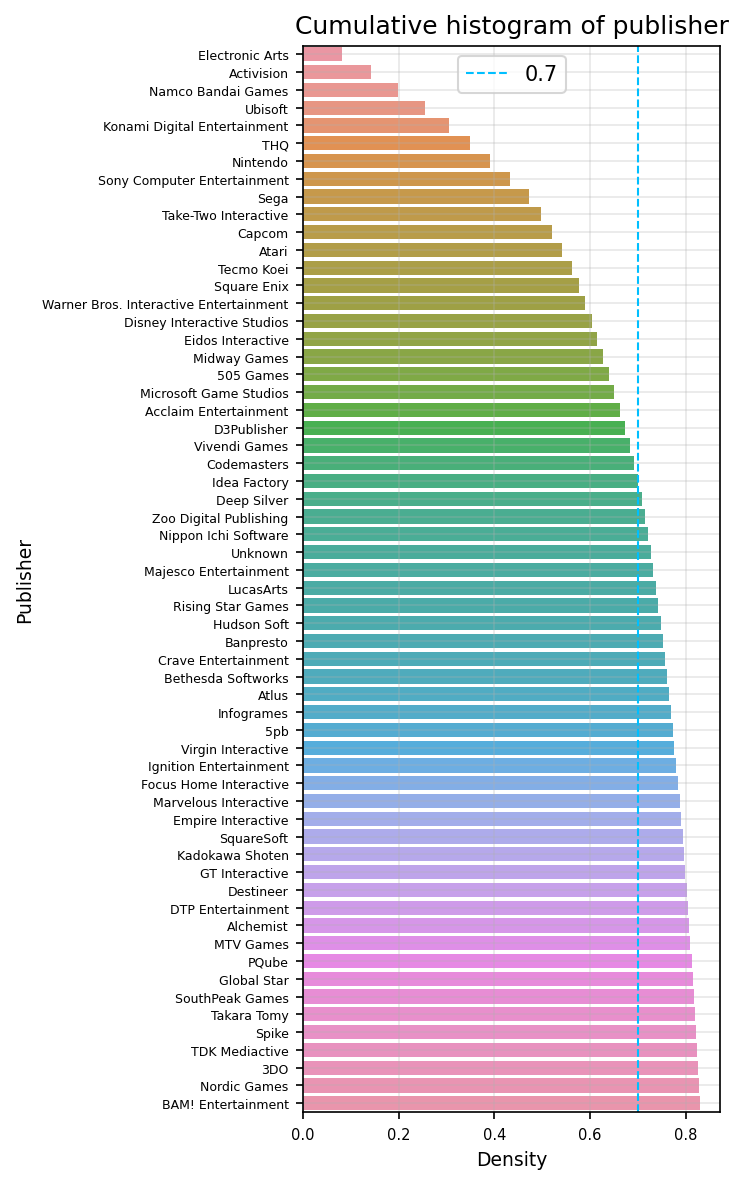

In [14]:
# 데이터에서 publisher 분포를 확인
publisher_hist = data["Publisher"].value_counts().sort_values(ascending=False)
cul_publisher_hist = np.cumsum(publisher_hist) # 데이터가 너무 많으므로 80%의 백분위를 차지하는 publisher만 추출하기 위한 전처리

# 데이터 시각화
plt.figure(figsize = (5,8))
plt.gcf().set_dpi(150)
plt.title("Cumulative histogram of publisher")
sns.barplot(x = (cul_publisher_hist.values/cul_publisher_hist.values[-1])[:60], y = cul_publisher_hist.index[:60])
plt.axvline(0.7, lw = 1, ls = "--", c= "deepskyblue", label = "0.7")
plt.xlabel("Density", fontsize = 9)
plt.ylabel("Publisher", fontsize = 9)
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 6)
plt.grid(alpha = 0.3)
plt.legend(loc = "best")
plt.tight_layout()
plt.show()

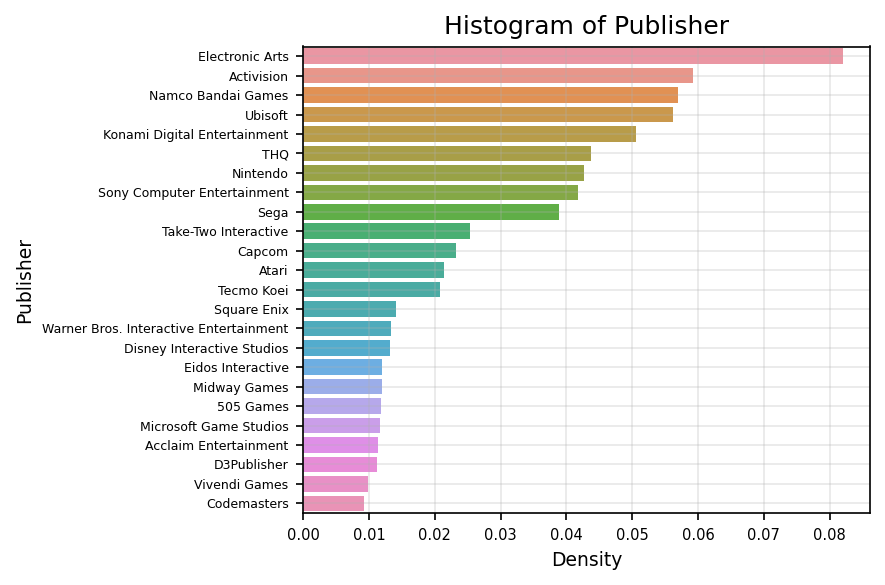

In [15]:
# 위 전처리에 의해서 70%의 백분위에 해당하는 publisher만 추려서 시장의 데이터를 비교
publisher_70 = len(cul_publisher_hist[cul_publisher_hist/cul_publisher_hist[-1] < 0.7])
plt.figure()
plt.gcf().set_dpi(150)
plt.title("Histogram of Publisher")
sns.barplot(x = (publisher_hist.values/publisher_hist.values.sum())[:publisher_70], y = publisher_hist.index[:publisher_70])
plt.xlabel("Density", fontsize = 9)
plt.ylabel("Publisher", fontsize = 9)
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 6)
plt.grid(alpha = 0.3)
plt.tight_layout()
plt.show()

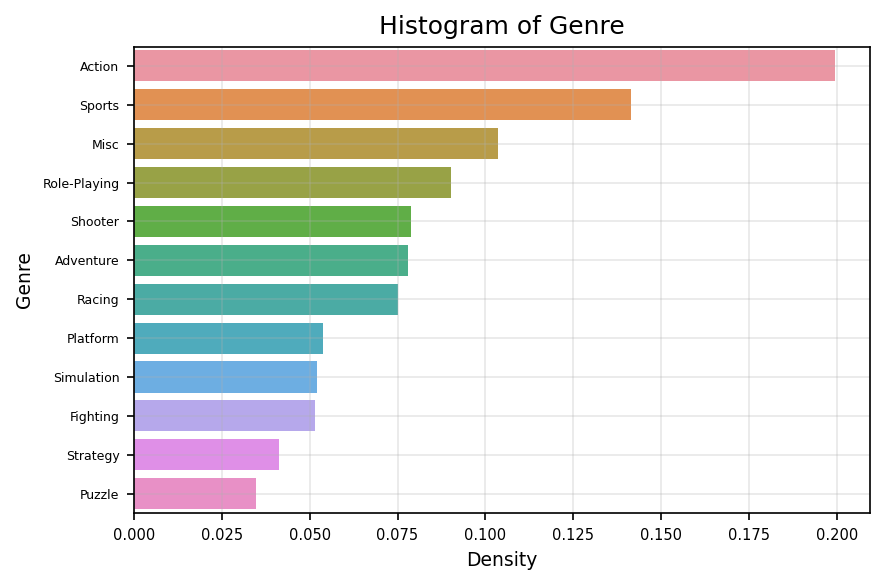

In [16]:
# 데이터에서 genre 분포를 확인
genre_hist = data["Genre"].value_counts().sort_values(ascending=False)

# genre의 분포를 시각화
plt.figure()
plt.gcf().set_dpi(150)
plt.title("Histogram of Genre")
sns.barplot(x = (genre_hist.values/genre_hist.values.sum()), y = genre_hist.index)
plt.xlabel("Density", fontsize = 9)
plt.ylabel("Genre", fontsize = 9)
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 6)
plt.grid(alpha = 0.3)
plt.tight_layout()
plt.show()

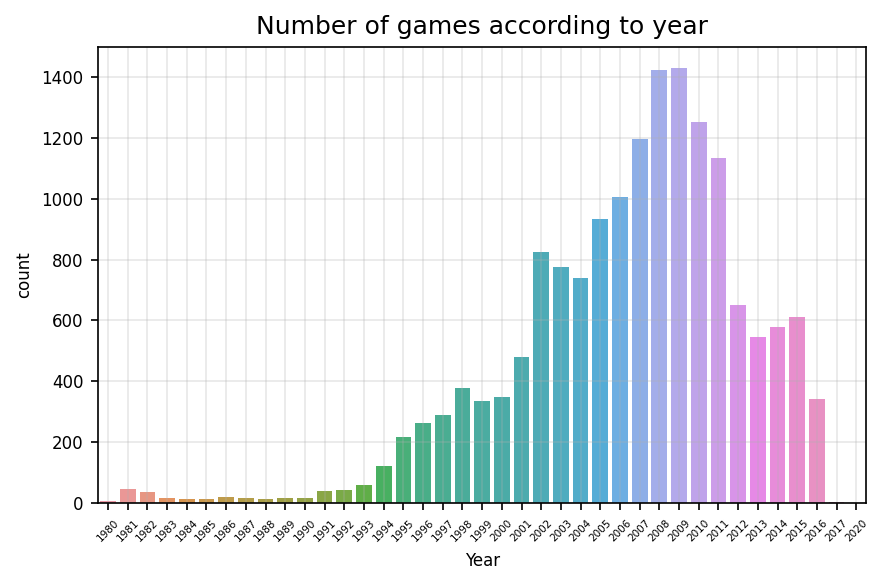

In [17]:
# 년도에 따른 데이터 수 분포 확인
year_hist = data["Year"].value_counts().sort_index()

# 년도에 따른 데이터 수 분포 시각화 
plt.figure()
plt.gcf().set_dpi(150)
plt.title("Number of games according to year")
sns.barplot(x = year_hist.index, y = year_hist.values)
plt.xlabel("Year", fontsize = 8)
plt.ylabel("count", fontsize = 8)
plt.xticks(fontsize = 5, rotation = 45)
plt.yticks(fontsize = 8)
plt.grid(alpha = 0.3)
plt.tight_layout()
plt.show()

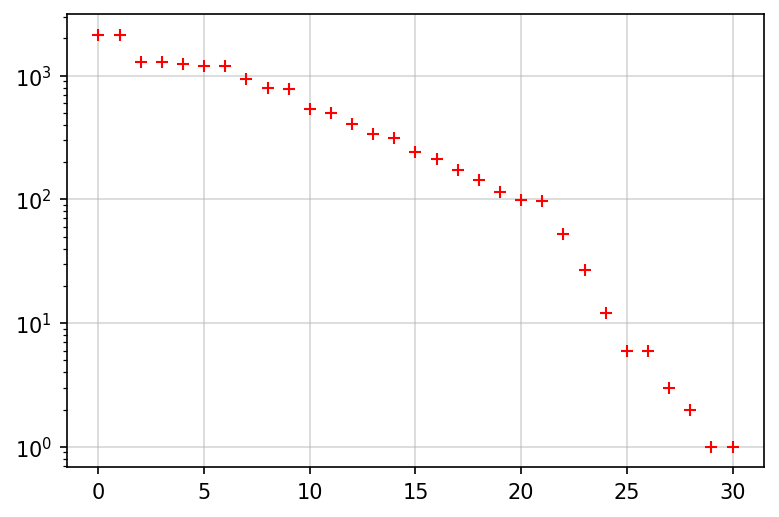

In [18]:
# platform 데이터 분포를 확인하기 위해서 축의 스케일 변경 => 지수함수 분포임을 확인
platform_hist = data["Platform"].value_counts().sort_values(ascending=False)
plt.figure()
plt.gcf().set_dpi(150)
plt.plot(platform_hist.values, "r+")
# plt.xscale("log")
plt.yscale("log")
plt.grid(alpha = 0.5)
plt.show()

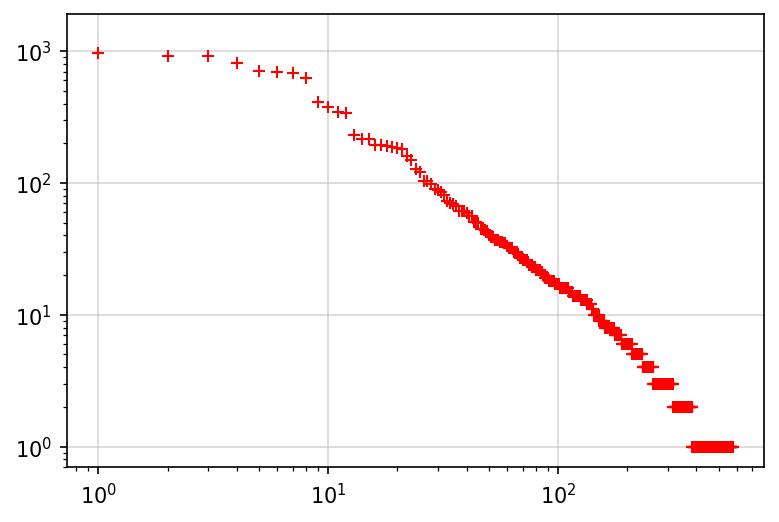

In [19]:
# publisher 데이터 분포를 확인하기 위해서 축의 스케일 변경 => 멱함수 분포임을 확인
publisher_hist = data["Publisher"].value_counts().sort_values(ascending=False)
plt.figure()
plt.gcf().set_dpi(150)
plt.plot(publisher_hist.values, "r+")
plt.xscale("log")
plt.yscale("log")
plt.grid(alpha = 0.5)
plt.show()

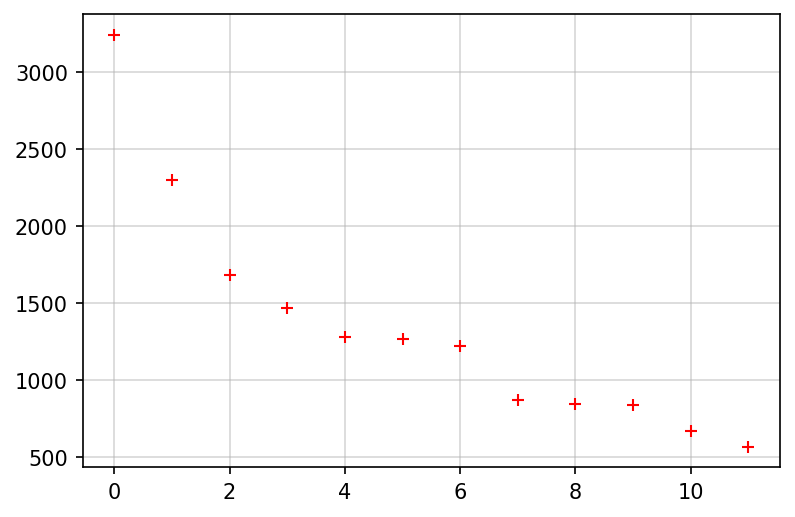

In [20]:
# genre 데이터 분포를 확인하기 위해서 축의 스케일 변경 => 명확하지 않음
genre_hist = data["Genre"].value_counts().sort_values(ascending=False)
plt.figure()
plt.gcf().set_dpi(150)
plt.plot(genre_hist.values, "r+")
# plt.xscale("log")
# plt.yscale("log")
plt.grid(alpha = 0.5)
plt.show()

## 지역별 장르 비교

### 분포확인(판매량 합)

In [21]:
# 지역별 장르를 비교하기 위해서 데이터 전처리
genre_region_data = data.groupby(["Genre"])[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()
genre_region_data_melt = genre_region_data.reset_index()
genre_region_data_melt = genre_region_data_melt.melt(id_vars = "Genre", var_name = "Region", value_name = "Sale")
genre_region_data_melt.head()

,Genre,Region,Sale
0,Action,NA_Sales,858.75
1,Adventure,NA_Sales,101.79
2,Fighting,NA_Sales,220.35
3,Misc,NA_Sales,394.73
4,Platform,NA_Sales,445.38


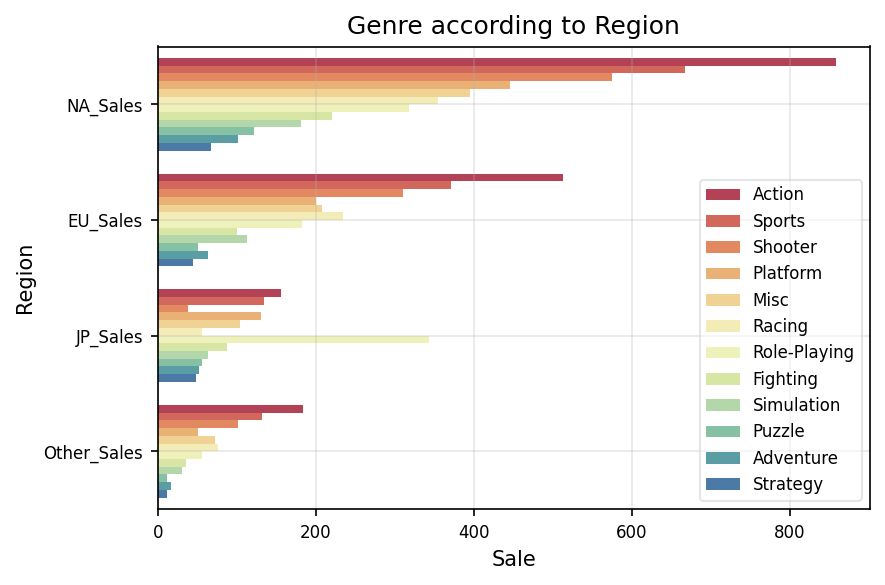

In [22]:
# 각 지역별 선호 장르를 비교하기 위해서 미국을 기준으로 장르를 오름차순으로 정리
order = ['Action', 'Sports', 'Shooter', 'Platform', 'Misc', 'Racing', 'Role-Playing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure', 'Strategy']

# 지역별 장르 데이터를 비교
plt.figure()
plt.gcf().set_dpi(150)
plt.title("Genre according to Region")
sns.barplot(x = "Sale", y = "Region", data = genre_region_data_melt, hue = "Genre", palette = "Spectral", hue_order = order)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.grid(alpha = 0.3)
plt.legend(loc = "best", framealpha = 0.5, fontsize = 8)
plt.tight_layout()
plt.show()

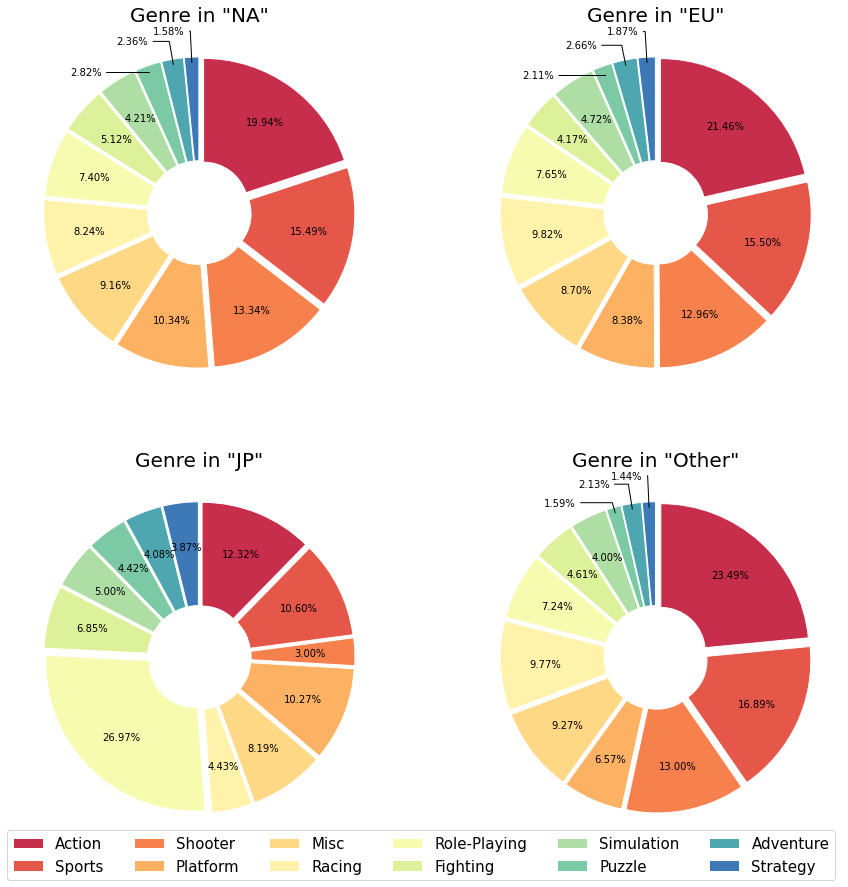

In [23]:
# 지역별 장르 데이터를 비교
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1} # 부채꼴 모양을 바꾸기 위한 특징들 
colormap = sns.color_palette("Spectral", len(order)) # 위와 색을 일치시킴
genre_region_data = genre_region_data.loc[order] # 위와 순서를 일치 시킴

# 데이터 시각화
fig, ax = plt.subplots(2,2, figsize = (15,15))
for idx, column in enumerate(genre_region_data.columns):
  ax[idx//2][idx%2].set_title("Genre in \"{}\"".format(column.split("_")[0]), size = 20)
  pie = ax[idx//2][idx%2].pie(genre_region_data[column]/genre_region_data[column].sum(), startangle = 90, counterclock = False, explode = [0.05]*len(genre_region_data[column]),
                      wedgeprops = wedgeprops, textprops = {"fontsize" : 10}, colors = colormap)
  total = np.sum(genre_region_data[column]) # 가격의 합

  threshold = 3 # 상한선 비율
  sum_pct = 0 # 퍼센티지
  
  bbox_props = dict(boxstyle = "square", fc = "w", ec = "w", alpha=0) # annotation 박스 스타일
  
  # annotation 설정
  config = dict(arrowprops = dict(arrowstyle = '-'), bbox = bbox_props, va = 'center')
  
  for i, genre in enumerate(genre_region_data.index):
      ang1, ang2 = ax[idx//2][idx%2].patches[i].theta1, ax[idx//2][idx%2].patches[i].theta2 # 파이의 시작 각도와 끝 각도
      center, r = ax[idx//2][idx%2].patches[i].center, ax[idx//2][idx%2].patches[i].r*1.4 # 원의 중심 좌표와 반지름길이

      if i < len(genre_region_data.index) - 1:
          sum_pct += float(f'{genre_region_data[column][i]/total*100:.2f}')
          text = f'{genre_region_data[column][i]/total*100:.2f}%'
      # 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
      else:
          text = f'{100-sum_pct:.2f}%'
      
      # 비율 상한선보다 작은 것들은 Annotation으로 만든다.
      if genre_region_data[column][i]/total*100 < threshold:
          ang = (ang1+ang2)/2 ## 중심각
          x = np.cos(np.deg2rad(ang)) # Annotation의 끝점에 해당하는 x좌표
          y = np.sin(np.deg2rad(ang)) # Annotation의 끝점에 해당하는 y좌표
          
          # x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
          # x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
          horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
          connectionstyle = "angle,angleA=0,angleB={}".format(ang) # 시작점과 끝점 연결 스타일
          config["arrowprops"].update({"connectionstyle": connectionstyle})
          ax[idx//2][idx%2].annotate(text, xy = (x, y), xytext = (2*x, 5*y-3.77), horizontalalignment = horizontalalignment, **config, fontsize = 10)
      else:
          x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] # 텍스트 x좌표
          y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] # 텍스트 y좌표
          ax[idx//2][idx%2].text(x, y, text, ha = 'center', va = 'center', fontsize = 10)
plt.legend(pie[0], genre_region_data.index, loc = (-1.25, -0.1), ncol = len(genre_region_data.index)//2, fontsize = 15)
plt.show()

### 가설검정

 "지역별 장르의 차이가 없다."라는 귀무가설을 설정하고 $\chi ^2$ test를 진행한다.

In [24]:
# chi square test를 위한 패키지 호출
from scipy import stats

In [25]:
# 분석할 데이터셋
genre_region_data

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.75,513.64,156.60,183.99
Sports,667.26,370.97,134.76,132.35
Shooter,574.48,310.23,38.18,101.86
Platform,445.38,200.63,130.53,51.45
Misc,394.73,208.15,104.18,72.64
Racing,354.70,235.02,56.32,76.51
Role-Playing,318.76,183.09,342.93,56.73
Fighting,220.35,99.90,87.14,36.15
Simulation,181.43,112.99,63.54,31.32


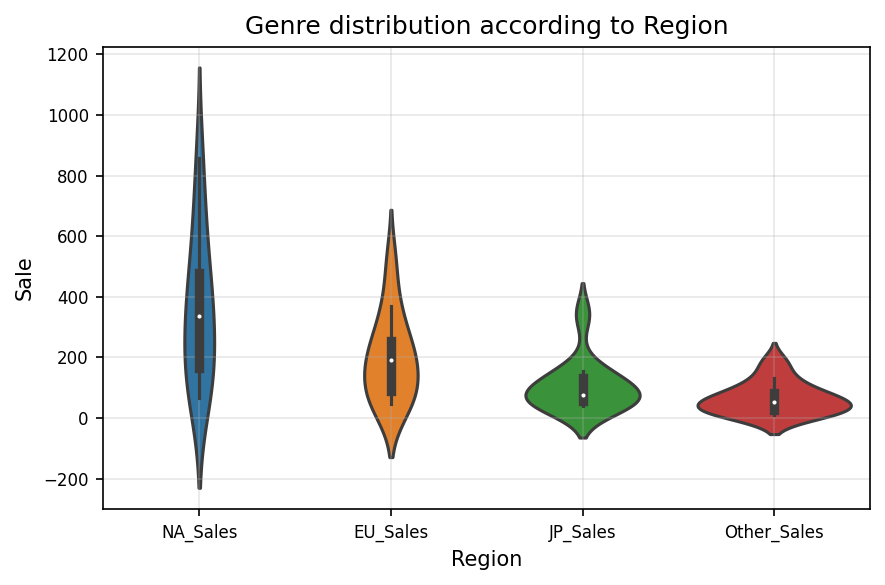

In [26]:
# 시각화를 위한 전처리
genre_region_data_melt = genre_region_data.reset_index().melt(id_vars = "Genre", var_name = "Region", value_name = "Sale")

# 지역별 장르 데이터를 비교
plt.figure()
plt.gcf().set_dpi(150)
plt.title("Genre distribution according to Region")
sns.violinplot(x = "Region", y = "Sale", data = genre_region_data_melt)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.grid(alpha = 0.3)
plt.tight_layout()
plt.show()

In [27]:
# chi square test 결과
chi2 = stats.chi2_contingency(genre_region_data)
print("statistic = {}, pvalue = {}, degree of freedom = {}".format(chi2[0], chi2[1], chi2[2]))

statistic = 684.3363405169283, pvalue = 9.635373883687227e-123, degree of freedom = 33


$\chi ^2$ test 결과 지역에 따른 장르 분포가 같다는 귀무가설은 p value가 매우 낮기 때문에 틀리다고 할 수 있다. 즉 지역에 따른 장르 분포는 매우 다르다.

### 분포확인(판매량 중앙값)

In [28]:
# 지역별 장르를 비교하기 위해서 데이터 전처리(중앙값)
genre_region_data_m = data.groupby(["Genre"])[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].median()
genre_region_data_m_melt = genre_region_data_m.reset_index()
genre_region_data_m_melt = genre_region_data_m_melt.melt(id_vars = "Genre", var_name = "Region", value_name = "Mean of sale")
genre_region_data_m_melt.head()

,Genre,Region,Mean of sale
0,Action,NA_Sales,0.10
1,Adventure,NA_Sales,0.00
2,Fighting,NA_Sales,0.08
3,Misc,NA_Sales,0.08
4,Platform,NA_Sales,0.14


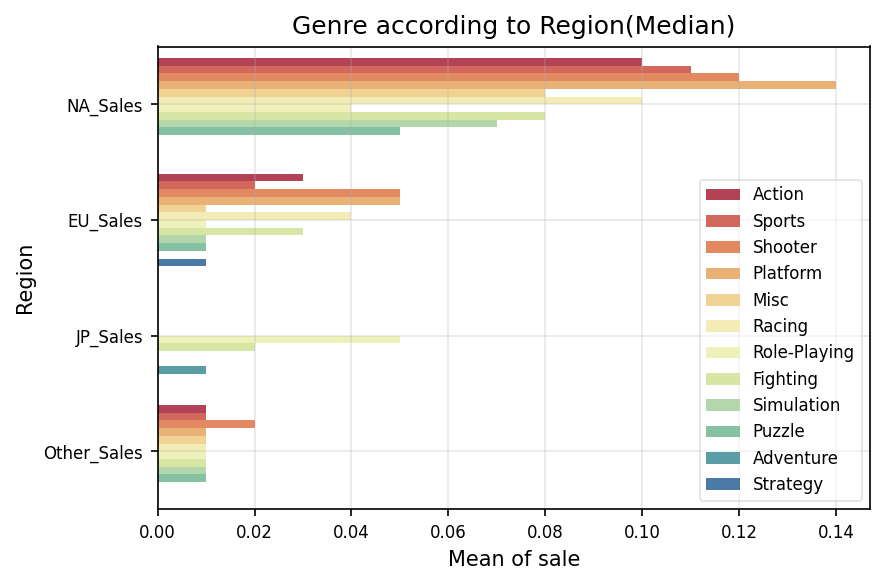

In [29]:
# 각 지역별 선호 장르를 비교하기 위해서 미국 판매량 기준으로 장르를 오름차순으로 정리(위와 비교를 위해 동일하게 정리)
order = ['Action', 'Sports', 'Shooter', 'Platform', 'Misc', 'Racing', 'Role-Playing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure', 'Strategy']

# 지역별 장르 데이터를 비교
plt.figure()
plt.gcf().set_dpi(150)
plt.title("Genre according to Region(Median)")
sns.barplot(x = "Mean of sale", y = "Region", data = genre_region_data_m_melt, hue = "Genre", palette = "Spectral", hue_order = order)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.grid(alpha = 0.3)
plt.legend(loc = "best", framealpha = 0.5, fontsize = 8)
plt.tight_layout()
plt.show()

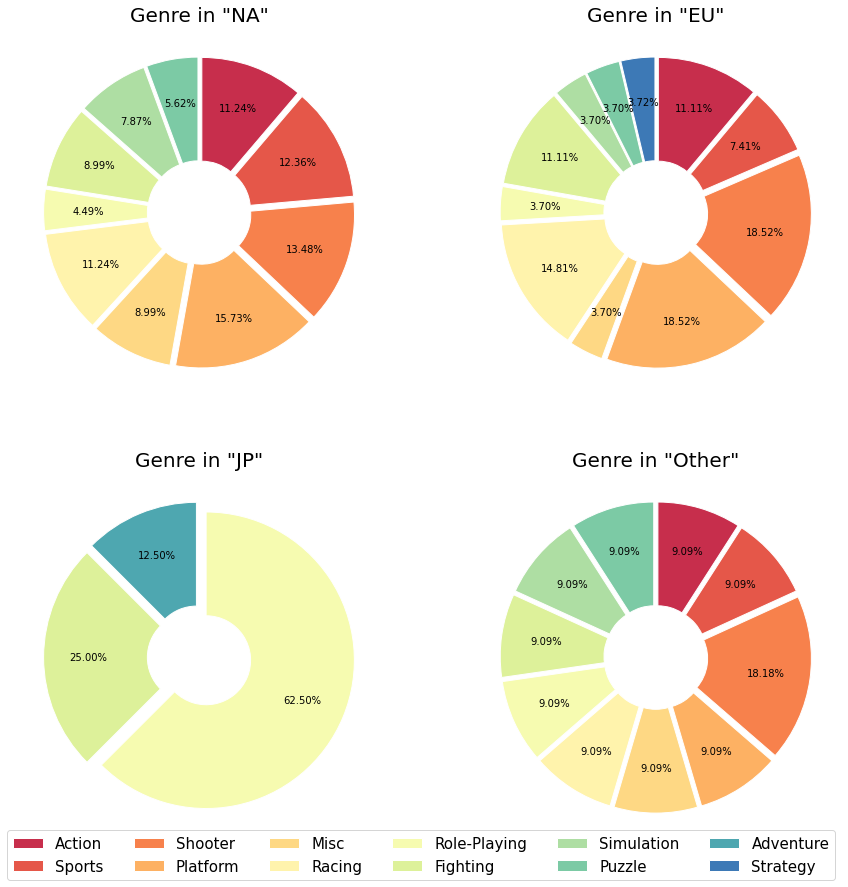

In [30]:
# 지역별 장르 데이터를 비교
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1} # 부채꼴 모양을 바꾸기 위한 특징들 
colormap = sns.color_palette("Spectral", len(order)) # 위와 색을 일치시킴
genre_region_data_m = genre_region_data_m.loc[order] # 위와 순서를 일치 시킴

# 데이터 시각화
fig, ax = plt.subplots(2,2, figsize = (15,15))
for idx, column in enumerate(genre_region_data_m.columns):
  ax[idx//2][idx%2].set_title("Genre in \"{}\"".format(column.split("_")[0]), size = 20)
  pie = ax[idx//2][idx%2].pie(genre_region_data_m[column]/genre_region_data_m[column].sum(), startangle = 90, counterclock = False, explode = [0.05]*len(genre_region_data_m[column]),
                      wedgeprops = wedgeprops, textprops = {"fontsize" : 10}, colors = colormap)
  total = np.sum(genre_region_data_m[column]) # 가격의 합

  threshold = 3 # 상한선 비율
  sum_pct = 0 # 퍼센티지
  
  bbox_props = dict(boxstyle = "square", fc = "w", ec = "w", alpha=0) # annotation 박스 스타일
  
  # annotation 설정
  config = dict(arrowprops = dict(arrowstyle = '-'), bbox = bbox_props, va = 'center')
  
  for i, genre in enumerate(genre_region_data.index):
      ang1, ang2 = ax[idx//2][idx%2].patches[i].theta1, ax[idx//2][idx%2].patches[i].theta2 # 파이의 시작 각도와 끝 각도
      center, r = ax[idx//2][idx%2].patches[i].center, ax[idx//2][idx%2].patches[i].r*1.4 # 원의 중심 좌표와 반지름길이

      if i < len(genre_region_data_m.index) - 1:
          sum_pct += float(f'{genre_region_data_m[column][i]/total*100:.2f}')
          text = f'{genre_region_data_m[column][i]/total*100:.2f}%'
      # 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
      else:
          text = f'{100-sum_pct:.2f}%'
      
      # 비율 상한선보다 작은 것들은 Annotation으로 만든다.
      if genre_region_data_m[column][i]/total*100 < threshold and genre_region_data_m[column][i]/total*100 > 0:
          ang = (ang1+ang2)/2 ## 중심각
          x = np.cos(np.deg2rad(ang)) # Annotation의 끝점에 해당하는 x좌표
          y = np.sin(np.deg2rad(ang)) # Annotation의 끝점에 해당하는 y좌표
          
          # x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
          # x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
          horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
          connectionstyle = "angle,angleA=0,angleB={}".format(ang) # 시작점과 끝점 연결 스타일
          config["arrowprops"].update({"connectionstyle": connectionstyle})
          ax[idx//2][idx%2].annotate(text, xy = (x, y), xytext = (1.5*x, 1.1*y), horizontalalignment = horizontalalignment, **config, fontsize = 10)
      elif genre_region_data_m[column][i]/total*100 > 0:
          x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] # 텍스트 x좌표
          y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] # 텍스트 y좌표
          ax[idx//2][idx%2].text(x, y, text, ha = 'center', va = 'center', fontsize = 10)
plt.legend(pie[0], genre_region_data_m.index, loc = (-1.25, -0.1), ncol = len(genre_region_data_m.index)//2, fontsize = 15)
plt.show()

### 가설검정
 "지역별 장르의 중앙값 분포는 차이가 없다."라는 귀무가설을 설정하고 $\chi ^2$ test를 진행한다.

In [31]:
# 분석할 데이터셋
genre_region_data_m

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.10,0.03,0.00,0.01
Sports,0.11,0.02,0.00,0.01
Shooter,0.12,0.05,0.00,0.02
Platform,0.14,0.05,0.00,0.01
Misc,0.08,0.01,0.00,0.01
Racing,0.10,0.04,0.00,0.01
Role-Playing,0.04,0.01,0.05,0.01
Fighting,0.08,0.03,0.02,0.01
Simulation,0.07,0.01,0.00,0.01


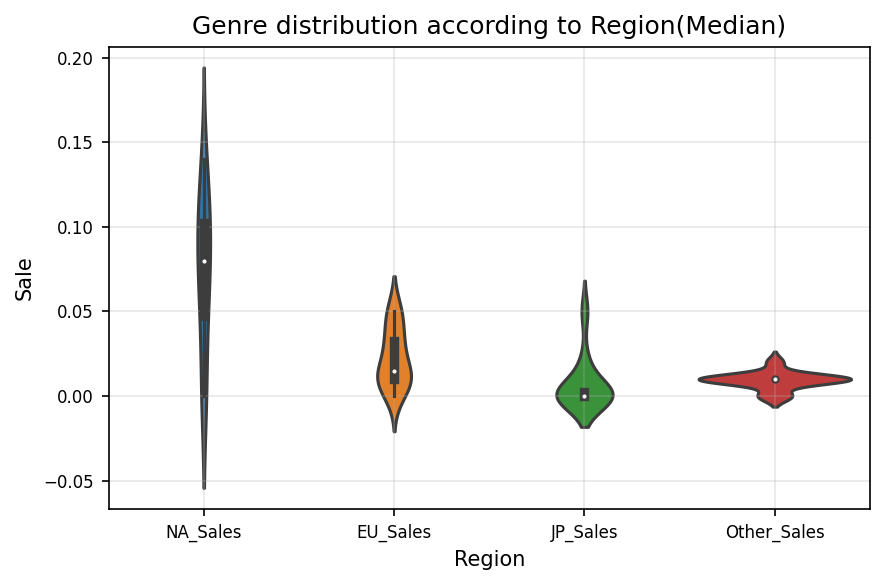

In [32]:
# 시각화를 위한 전처리
genre_region_data_m_melt = genre_region_data_m.reset_index().melt(id_vars = "Genre", var_name = "Region", value_name = "Sale")

# 지역별 장르 데이터를 비교
plt.figure()
plt.gcf().set_dpi(150)
plt.title("Genre distribution according to Region(Median)")
sns.violinplot(x = "Region", y = "Sale", data = genre_region_data_m_melt)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.grid(alpha = 0.3)
plt.tight_layout()
plt.show()

In [33]:
genre_region_data_m

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.10,0.03,0.00,0.01
Sports,0.11,0.02,0.00,0.01
Shooter,0.12,0.05,0.00,0.02
Platform,0.14,0.05,0.00,0.01
Misc,0.08,0.01,0.00,0.01
Racing,0.10,0.04,0.00,0.01
Role-Playing,0.04,0.01,0.05,0.01
Fighting,0.08,0.03,0.02,0.01
Simulation,0.07,0.01,0.00,0.01


In [34]:
# chi square test 결과
chi2 = stats.chi2_contingency(genre_region_data_m.values.T)
print("statistic = {}, pvalue = {}, degree of freedom = {}".format(chi2[0], chi2[1], chi2[2]))

statistic = 0.6334024728534433, pvalue = 1.0, degree of freedom = 33


$\chi ^2$ test 결과 지역에 따른 장르의 중앙값 분포가 같다는 귀무가설은 p value가 1이다. 이는 귀무가설이 틀리기 어렵다라는 뜻이지만 값의 분포의 분산이 작고 평균이 다 비슷해서 생기는 현상이라고 추론된다.

### 발매량 분포확인

In [35]:
# 지역별 장르를 비교하기 위해서 데이터 전처리(발매량)
data_temp = data.copy()
data_temp = data_temp.replace(0, np.nan)
genre_region_data_c = data_temp.groupby(["Genre"])[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].count()
genre_region_data_c_melt = genre_region_data_c.reset_index()
genre_region_data_c_melt = genre_region_data_c_melt.melt(id_vars = "Genre", var_name = "Region", value_name = "Count of sale")
genre_region_data_c_melt.head()

,Genre,Region,Count of sale
0,Action,NA_Sales,2516
1,Adventure,NA_Sales,536
2,Fighting,NA_Sales,584
3,Misc,NA_Sales,1159
4,Platform,NA_Sales,790


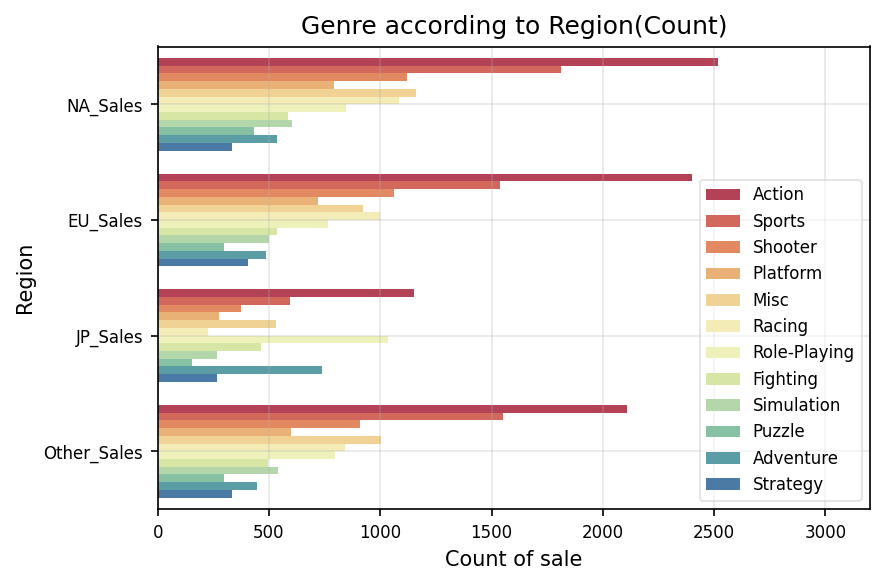

In [36]:
# 각 지역별 선호 장르를 비교하기 위해서 미국 판매량 기준으로 장르를 오름차순으로 정리(위와 비교를 위해 동일하게 정리)
order = ['Action', 'Sports', 'Shooter', 'Platform', 'Misc', 'Racing', 'Role-Playing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure', 'Strategy']

# 지역별 장르 데이터를 비교
plt.figure()
plt.gcf().set_dpi(150)
plt.title("Genre according to Region(Count)")
sns.barplot(x = "Count of sale", y = "Region", data = genre_region_data_c_melt, hue = "Genre", palette = "Spectral", hue_order = order)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlim(0, 3200)
plt.grid(alpha = 0.3)
plt.legend(loc = "best", framealpha = 0.5, fontsize = 8)
plt.tight_layout()
plt.show()

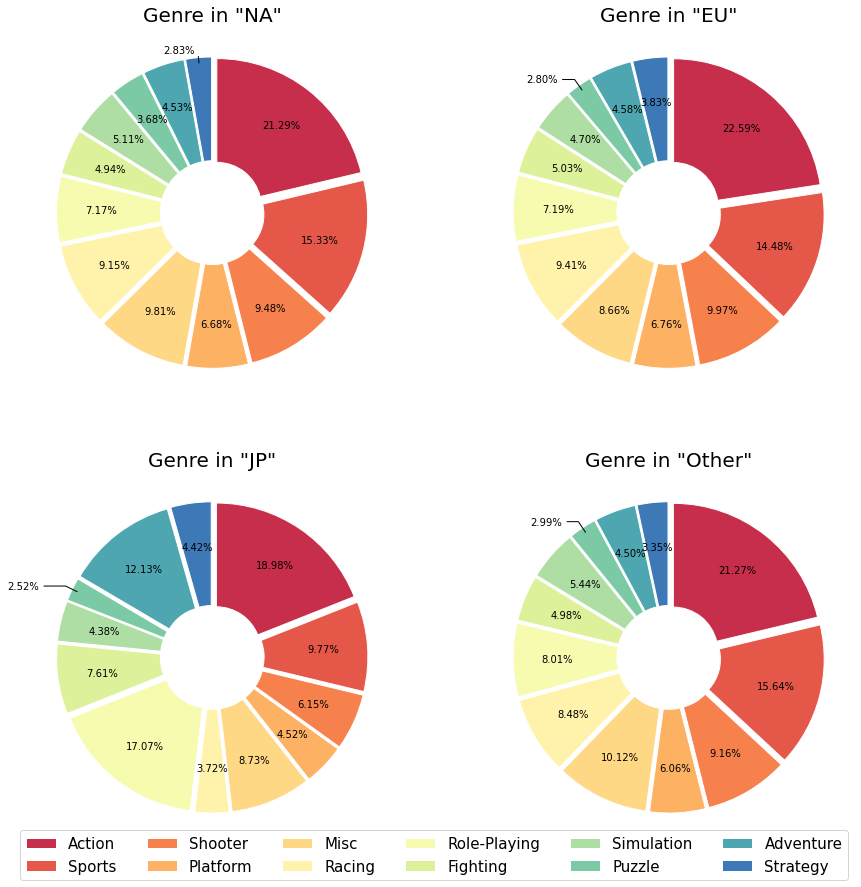

In [37]:
# 지역별 장르 데이터를 비교
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1} # 부채꼴 모양을 바꾸기 위한 특징들 
colormap = sns.color_palette("Spectral", len(order)) # 위와 색을 일치시킴
genre_region_data_c = genre_region_data_c.loc[order] # 위와 순서를 일치 시킴

# 데이터 시각화
fig, ax = plt.subplots(2,2, figsize = (15,15))
for idx, column in enumerate(genre_region_data_c.columns):
  ax[idx//2][idx%2].set_title("Genre in \"{}\"".format(column.split("_")[0]), size = 20)
  pie = ax[idx//2][idx%2].pie(genre_region_data_c[column]/genre_region_data_c[column].sum(), startangle = 90, counterclock = False, explode = [0.05]*len(genre_region_data_c[column]),
                      wedgeprops = wedgeprops, textprops = {"fontsize" : 10}, colors = colormap)
  total = np.sum(genre_region_data_c[column]) # 가격의 합

  threshold = 3 # 상한선 비율
  sum_pct = 0 # 퍼센티지
  
  bbox_props = dict(boxstyle = "square", fc = "w", ec = "w", alpha=0) # annotation 박스 스타일
  
  # annotation 설정
  config = dict(arrowprops = dict(arrowstyle = '-'), bbox = bbox_props, va = 'center')
  
  for i, genre in enumerate(genre_region_data_c.index):
      ang1, ang2 = ax[idx//2][idx%2].patches[i].theta1, ax[idx//2][idx%2].patches[i].theta2 # 파이의 시작 각도와 끝 각도
      center, r = ax[idx//2][idx%2].patches[i].center, ax[idx//2][idx%2].patches[i].r*1.4 # 원의 중심 좌표와 반지름길이

      if i < len(genre_region_data.index) - 1:
          sum_pct += float(f'{genre_region_data_c[column][i]/total*100:.2f}')
          text = f'{genre_region_data_c[column][i]/total*100:.2f}%'
      # 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
      else:
          text = f'{100-sum_pct:.2f}%'
      
      # 비율 상한선보다 작은 것들은 Annotation으로 만든다.
      if genre_region_data_c[column][i]/total*100 < threshold and genre_region_data_c[column][i]/total*100 > 0:
          ang = (ang1+ang2)/2 ## 중심각
          x = np.cos(np.deg2rad(ang)) # Annotation의 끝점에 해당하는 x좌표
          y = np.sin(np.deg2rad(ang)) # Annotation의 끝점에 해당하는 y좌표
          
          # x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
          # x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
          horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
          connectionstyle = "angle,angleA=0,angleB={}".format(ang) # 시작점과 끝점 연결 스타일
          config["arrowprops"].update({"connectionstyle": connectionstyle})
          ax[idx//2][idx%2].annotate(text, xy = (x, y), xytext = (1.3*x, 1.1*y), horizontalalignment = horizontalalignment, **config, fontsize = 10)
      elif genre_region_data_c[column][i]/total*100 > 0:
          x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] # 텍스트 x좌표
          y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] # 텍스트 y좌표
          ax[idx//2][idx%2].text(x, y, text, ha = 'center', va = 'center', fontsize = 10)
plt.legend(pie[0], genre_region_data_c.index, loc = (-1.25, -0.1), ncol = len(genre_region_data_c.index)//2, fontsize = 15)
plt.show()

### 가설검정

 "지역별 장르의 차이가 없다."라는 귀무가설을 설정하고 $\chi ^2$ test를 진행한다.

In [38]:
# 분석할 데이터셋
genre_region_data_c

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,2516,2402,1152,2110
Sports,1812,1540,593,1552
Shooter,1121,1060,373,909
Platform,790,719,274,601
Misc,1159,921,530,1004
Racing,1082,1001,226,841
Role-Playing,848,765,1036,795
Fighting,584,535,462,494
Simulation,604,500,266,540


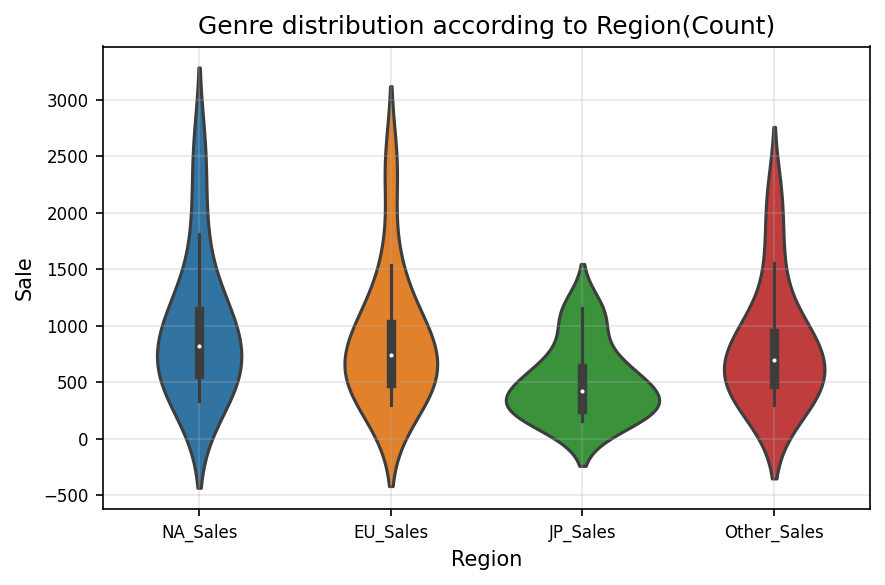

In [39]:
# 시각화를 위한 전처리
genre_region_data_c_melt = genre_region_data_c.reset_index().melt(id_vars = "Genre", var_name = "Region", value_name = "Sale")

# 지역별 장르 데이터를 비교
plt.figure()
plt.gcf().set_dpi(150)
plt.title("Genre distribution according to Region(Count)")
sns.violinplot(x = "Region", y = "Sale", data = genre_region_data_c_melt)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.grid(alpha = 0.3)
plt.tight_layout()
plt.show()

In [40]:
# chi square test 결과
chi2 = stats.chi2_contingency(genre_region_data_c)
print("statistic = {}, pvalue = {}, degree of freedom = {}".format(chi2[0], chi2[1], chi2[2]))

statistic = 1618.598018660334, pvalue = 0.0, degree of freedom = 33


$\chi ^2$ test 결과 지역에 따른 장르 분포가 같다는 귀무가설은 p value가 매우 낮기 때문에 틀리다고 할 수 있다. 즉 지역에 따른 장르 발매량 분포는 매우 다르다.

### 판매량이 높은 장르의 분포 비교

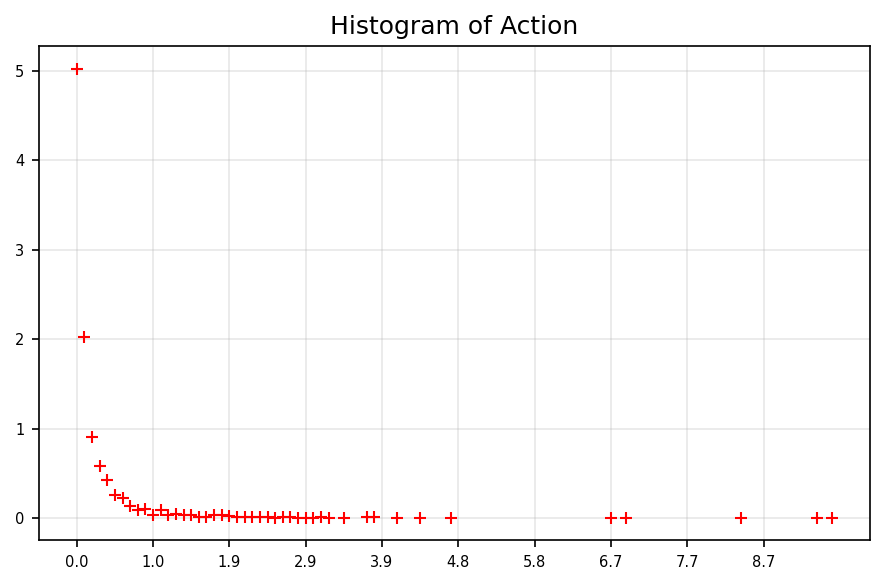

In [41]:
# 액션의 히스토그램 분석
hist, bins = np.histogram(data.loc[data["Genre"] == "Action", "NA_Sales"], bins = 100, density = True)
hist[hist == 0] = np.nan

# 액션의 히스토그램 분석 시각화
plt.figure()
plt.gcf().set_dpi(150)
plt.title("Histogram of Action")
plt.plot(bins[:-1], hist, "r+")
plt.xticks(bins[:-1:10], ["{:,.1f}".format(i) for i in bins[:-1:10]], fontsize = 7)
plt.yticks(fontsize = 7)
# plt.xlim(0,8.8)
# plt.ylim(0.,6)
plt.grid(alpha = 0.3)
plt.tight_layout()
plt.show()

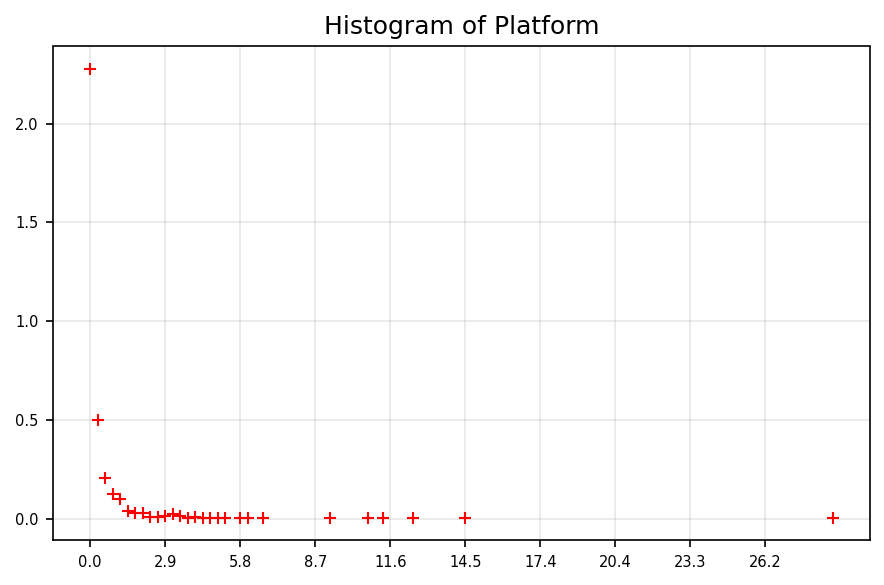

In [42]:
# 플랫폼의 히스토그램
hist, bins = np.histogram(data.loc[data["Genre"] == "Platform", "NA_Sales"], bins = 100, density = True)
hist[hist == 0] = np.nan

# 플랫폼의 히스토그램 시각화
plt.figure()
plt.gcf().set_dpi(150)
plt.title("Histogram of Platform")
plt.plot(bins[:-1], hist, "r+")
plt.xticks(bins[:-1:10], ["{:,.1f}".format(i) for i in bins[:-1:10]], fontsize = 7)
plt.yticks(fontsize = 7)
# plt.xlim(0,8.8)
# plt.ylim(0.,6)
plt.grid(alpha = 0.3)
plt.tight_layout()
plt.show()

## 연도별 장르 비교

### 전세계의 연도별 장르 판매량의 합 분포

In [43]:
# 연도별 장르를 비교하기 위해서 데이터 전처리
data_temp = data.copy()
bins = np.arange(1980,2030,5)
labels = ["{}~{}".format(i, i+5) for i in np.arange(1980,2025,5)]
data_temp["Year"] = pd.cut(data_temp["Year"], bins = bins, labels = labels, right = False)
year_genre_region_data = data_temp.groupby(["Year", "Genre"])[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum().reset_index()
year_genre_region_data["Total_Sale"] = year_genre_region_data.iloc[:,2:].sum(axis = 1)
year_genre_region_data_melt = year_genre_region_data.melt(id_vars = ["Year", "Genre"], var_name = "Region", value_name = "Sale")
year_genre_region_data_melt

,Year,Genre,Region,Sale
0,1980~1985,Action,NA_Sales,23.72
1,1980~1985,Adventure,NA_Sales,0.38
2,1980~1985,Fighting,NA_Sales,0.72
3,1980~1985,Misc,NA_Sales,3.35
4,1980~1985,Platform,NA_Sales,13.96
...,...,...,...,...
535,2020~2025,Role-Playing,Total_Sale,0.00
536,2020~2025,Shooter,Total_Sale,0.00
537,2020~2025,Simulation,Total_Sale,0.29
538,2020~2025,Sports,Total_Sale,0.00


In [44]:
# 연도별 데이터의 분균일로 백분위로 바꾸어 분석하기위한 전처리
year_genre_region_data_melt["Percentage"] = year_genre_region_data_melt.groupby(["Year", "Region"])[["Sale"]].apply(lambda x : x/x.sum())
year_genre_region_data_melt

,Year,Genre,Region,Sale,Percentage
0,1980~1985,Action,NA_Sales,23.72,0.212755
1,1980~1985,Adventure,NA_Sales,0.38,0.003408
2,1980~1985,Fighting,NA_Sales,0.72,0.006458
3,1980~1985,Misc,NA_Sales,3.35,0.030048
4,1980~1985,Platform,NA_Sales,13.96,0.125213
...,...,...,...,...,...
535,2020~2025,Role-Playing,Total_Sale,0.00,0.000000
536,2020~2025,Shooter,Total_Sale,0.00,0.000000
537,2020~2025,Simulation,Total_Sale,0.29,1.000000
538,2020~2025,Sports,Total_Sale,0.00,0.000000


In [45]:
# 전체의 시간에 따른 백분위 전처리
year_genre_region_data_melt_total = year_genre_region_data_melt[year_genre_region_data_melt["Region"] == "Total_Sale"].reset_index(drop = True)
year_genre_region_data_melt_total

,Year,Genre,Region,Sale,Percentage
0,1980~1985,Action,Total_Sale,26.34,0.184725
1,1980~1985,Adventure,Total_Sale,0.40,0.002805
2,1980~1985,Fighting,Total_Sale,0.77,0.005400
3,1980~1985,Misc,Total_Sale,7.16,0.050214
4,1980~1985,Platform,Total_Sale,19.57,0.137247
...,...,...,...,...,...
103,2020~2025,Role-Playing,Total_Sale,0.00,0.000000
104,2020~2025,Shooter,Total_Sale,0.00,0.000000
105,2020~2025,Simulation,Total_Sale,0.29,1.000000
106,2020~2025,Sports,Total_Sale,0.00,0.000000


In [46]:
year_genre_region_data_melt_total["Rank"] = year_genre_region_data_melt_total.groupby("Year")[["Percentage"]].rank(ascending = False)
year_genre_region_data_melt_total

,Year,Genre,Region,Sale,Percentage,Rank
0,1980~1985,Action,Total_Sale,26.34,0.184725,2.0
1,1980~1985,Adventure,Total_Sale,0.40,0.002805,10.0
2,1980~1985,Fighting,Total_Sale,0.77,0.005400,8.0
3,1980~1985,Misc,Total_Sale,7.16,0.050214,7.0
4,1980~1985,Platform,Total_Sale,19.57,0.137247,3.0
...,...,...,...,...,...,...
103,2020~2025,Role-Playing,Total_Sale,0.00,0.000000,7.0
104,2020~2025,Shooter,Total_Sale,0.00,0.000000,7.0
105,2020~2025,Simulation,Total_Sale,0.29,1.000000,1.0
106,2020~2025,Sports,Total_Sale,0.00,0.000000,7.0


In [47]:
year_genre_region_data_melt_total[(year_genre_region_data_melt_total["Rank"] < 4)].sort_values(by= ["Year", "Rank"])

,Year,Genre,Region,Sale,Percentage,Rank
8,1980~1985,Shooter,Total_Sale,52.49,0.368118,1.0
0,1980~1985,Action,Total_Sale,26.34,0.184725,2.0
4,1980~1985,Platform,Total_Sale,19.57,0.137247,3.0
16,1985~1990,Platform,Total_Sale,102.69,0.439993,1.0
17,1985~1990,Puzzle,Total_Sale,46.54,0.199409,2.0
12,1985~1990,Action,Total_Sale,24.76,0.106089,3.0
28,1990~1995,Platform,Total_Sale,91.46,0.323237,1.0
26,1990~1995,Fighting,Total_Sale,32.84,0.116063,2.0
31,1990~1995,Role-Playing,Total_Sale,27.36,0.096696,3.0
43,1995~2000,Role-Playing,Total_Sale,155.41,0.156625,1.0


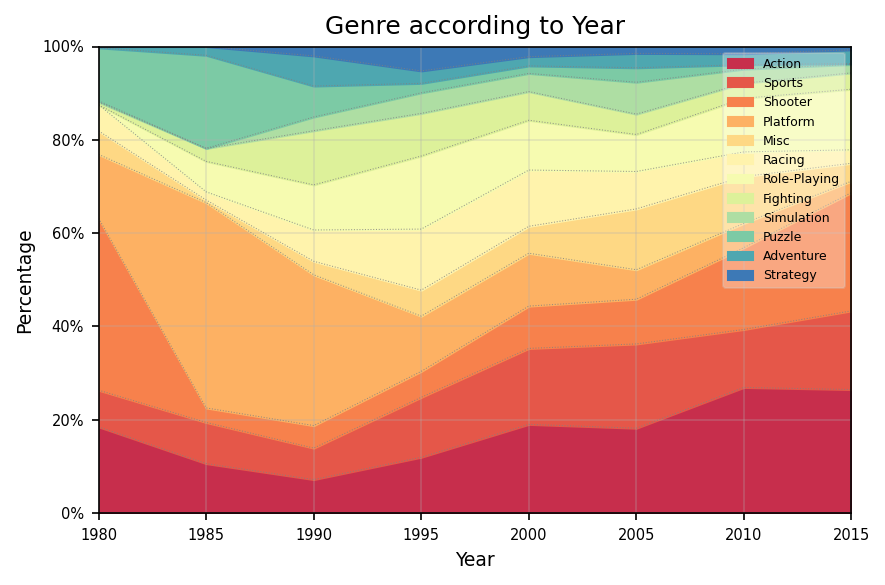

In [48]:
# 각 지역별 선호 장르를 비교하기 위해서 미국을 기준으로 장르를 오름차순으로 정리
order = ['Action', 'Sports', 'Shooter', 'Platform', 'Misc', 'Racing', 'Role-Playing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure', 'Strategy']
colormap = sns.color_palette("Spectral", len(order)) # 위와 색을 일치시킴
year = ["{}~{}".format(i, i+5) for i in np.arange(1980,2025,5)]
year_t = dict([[y, idx] for idx, y in enumerate(year)])
stack = np.zeros(len(year))
stack_temp = np.zeros(len(year))

# 지역별 장르 데이터를 비교
plt.figure()
plt.gcf().set_dpi(150)
plt.title("Genre according to Year")
for idx, gen in enumerate(order):
  temp = year_genre_region_data_melt_total.loc[year_genre_region_data_melt_total["Genre"] == gen, ["Year", "Percentage"]]
  for y, p in temp.values:
    stack_temp[year_t[y]] += p
  plt.fill_between(np.arange(1980,2025,5), y1 = stack, y2 = stack_temp, color = colormap[idx], label = "{}".format(gen), alpha = 1)
  plt.plot(np.arange(1980,2025,5), stack, color = "grey", linewidth = 0.5, linestyle = "dotted", alpha = 0.8)
  stack = stack_temp.copy()
plt.xlabel("Year", fontsize = 9)
plt.ylabel("Percentage", fontsize = 9)
plt.xticks(fontsize = 7)
plt.yticks(np.arange(0, 1.2, 0.2), ["{:,.0f}%".format(i*100) for i in np.arange(0, 1.2, 0.2)] ,fontsize = 7)
plt.xlim(1980,2015)
plt.ylim(0,1)
plt.grid(alpha = 0.3)
plt.legend(loc = "upper right", framealpha = 0.3, fontsize = 6)
plt.tight_layout()
plt.show()

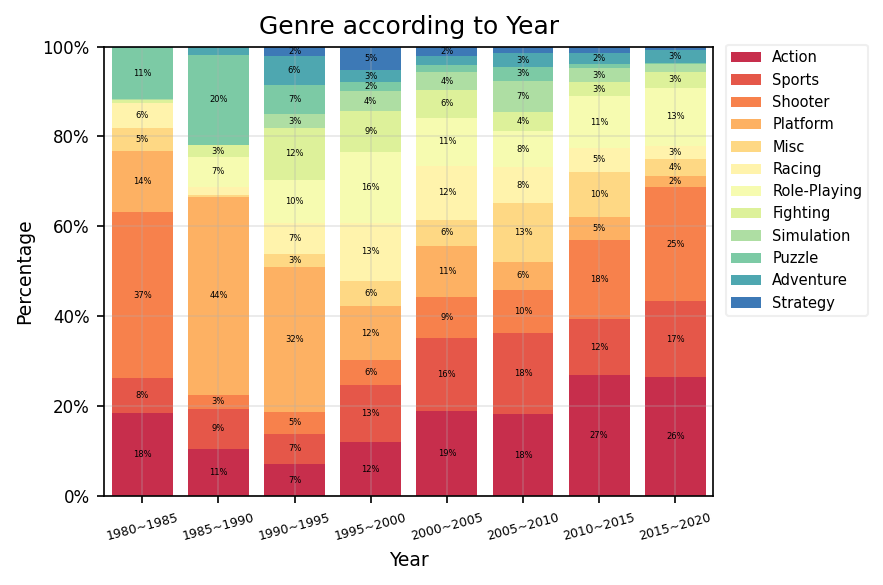

In [129]:
# 각 지역별 선호 장르를 비교하기 위해서 미국을 기준으로 장르를 오름차순으로 정리
order = ['Action', 'Sports', 'Shooter', 'Platform', 'Misc', 'Racing', 'Role-Playing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure', 'Strategy']
colormap = sns.color_palette("Spectral", len(order)) # 위와 색을 일치시킴
year = ["{}~{}".format(i, i+5) for i in np.arange(1980,2025,5)]
year_t = dict([[y, idx] for idx, y in enumerate(year)])
stack = np.zeros(len(year))

# 지역별 장르 데이터를 비교
plt.figure()
plt.gcf().set_dpi(150)
plt.title("Genre according to Year")
for idx, gen in enumerate(order):
  temp = year_genre_region_data_melt_total.loc[year_genre_region_data_melt_total["Genre"] == gen, ["Year", "Percentage"]]
  bar = plt.bar(year, temp.values[:,1], bottom = stack, color = colormap[idx], label = "{}".format(gen), width = 0.8)
  for idx, p in enumerate(bar.patches):
    if p.get_height()*100 > 2 :
      plt.annotate("{:,.0f}%".format(p.get_height()*100), (p.get_x() + p.get_width()/2., stack[idx]+ p.get_height()/2.),
                   ha = "center", va = "center", fontsize = 4, color = "k")  
  for y, p in temp.values:
    stack[year_t[y]] += p
plt.xticks(fontsize = 6, rotation = 15)
plt.yticks(np.arange(0, 1.2, 0.2), ["{:,.0f}%".format(i*100) for i in np.arange(0, 1.2, 0.2)] ,fontsize = 8)
plt.xlabel("Year", fontsize = 9)
plt.ylabel("Percentage", fontsize = 9)
plt.xlim(-0.5,7.5)
plt.ylim(0,1)
plt.grid(alpha = 0.3)
plt.legend(loc = (1.02, 0.4), framealpha = 0.3, fontsize = 7)
plt.tight_layout()
plt.show()

### 미국의 연도별 장르 판매량의 합 분포

In [50]:
year_genre_region_data_melt_NA = year_genre_region_data_melt[year_genre_region_data_melt["Region"] == "NA_Sales"]
year_genre_region_data_melt_NA

,Year,Genre,Region,Sale,Percentage
0,1980~1985,Action,NA_Sales,23.72,0.212755
1,1980~1985,Adventure,NA_Sales,0.38,0.003408
2,1980~1985,Fighting,NA_Sales,0.72,0.006458
3,1980~1985,Misc,NA_Sales,3.35,0.030048
4,1980~1985,Platform,NA_Sales,13.96,0.125213
...,...,...,...,...,...
103,2020~2025,Role-Playing,NA_Sales,0.00,0.000000
104,2020~2025,Shooter,NA_Sales,0.00,0.000000
105,2020~2025,Simulation,NA_Sales,0.27,1.000000
106,2020~2025,Sports,NA_Sales,0.00,0.000000


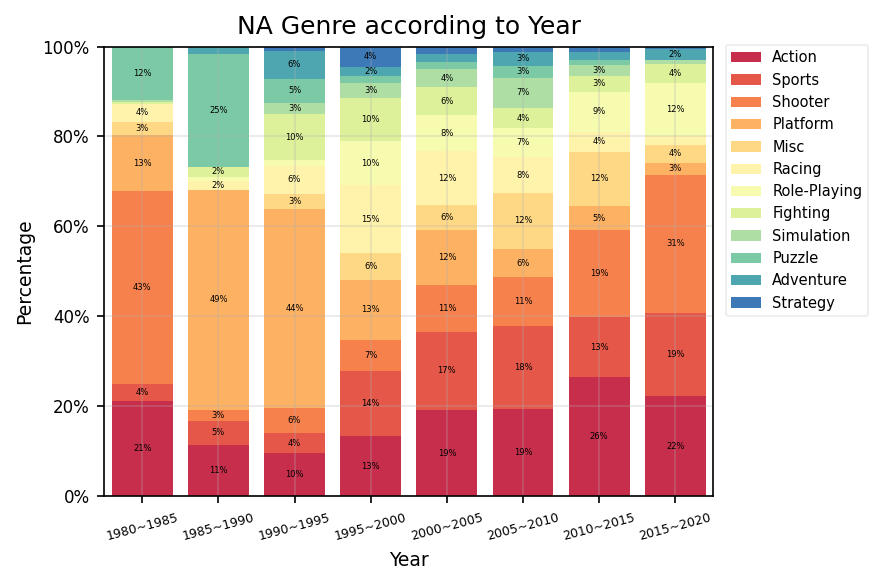

In [128]:
# 각 지역별 선호 장르를 비교하기 위해서 미국을 기준으로 장르를 오름차순으로 정리
order = ['Action', 'Sports', 'Shooter', 'Platform', 'Misc', 'Racing', 'Role-Playing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure', 'Strategy']
colormap = sns.color_palette("Spectral", len(order)) # 위와 색을 일치시킴
year = ["{}~{}".format(i, i+5) for i in np.arange(1980,2025,5)]
year_t = dict([[y, idx] for idx, y in enumerate(year)])
stack = np.zeros(len(year))

# 지역별 장르 데이터를 비교
plt.figure()
plt.gcf().set_dpi(150)
plt.title("NA Genre according to Year")
for idx, gen in enumerate(order):
  temp = year_genre_region_data_melt_NA.loc[year_genre_region_data_melt_NA["Genre"] == gen, ["Year", "Percentage"]]
  bar = plt.bar(year, temp.values[:,1], bottom = stack, color = colormap[idx], label = "{}".format(gen), width = 0.8)
  for idx, p in enumerate(bar.patches):
    if p.get_height()*100 > 2 :
      plt.annotate("{:,.0f}%".format(p.get_height()*100), (p.get_x() + p.get_width()/2., stack[idx]+ p.get_height()/2.),
                   ha = "center", va = "center", fontsize = 4, color = "k")  
  for y, p in temp.values:
    stack[year_t[y]] += p
plt.xlabel("Year", fontsize = 9)
plt.ylabel("Percentage", fontsize = 9)
plt.xticks(fontsize = 6, rotation = 15)
plt.yticks(np.arange(0, 1.2, 0.2), ["{:,.0f}%".format(i*100) for i in np.arange(0, 1.2, 0.2)] ,fontsize = 8)
plt.xlim(-0.5,7.5)
plt.ylim(0,1)
plt.grid(alpha = 0.3)
plt.legend(loc = (1.02, 0.4), framealpha = 0.3, fontsize = 7)
plt.tight_layout()
plt.show()

### 유럽의 연도별 장르 판매량의 합 분포

In [52]:
year_genre_region_data_melt_EU = year_genre_region_data_melt[year_genre_region_data_melt["Region"] == "EU_Sales"]
year_genre_region_data_melt_EU

,Year,Genre,Region,Sale,Percentage
108,1980~1985,Action,EU_Sales,1.57,0.219580
109,1980~1985,Adventure,EU_Sales,0.02,0.002797
110,1980~1985,Fighting,EU_Sales,0.04,0.005594
111,1980~1985,Misc,EU_Sales,0.20,0.027972
112,1980~1985,Platform,EU_Sales,1.08,0.151049
...,...,...,...,...,...
211,2020~2025,Role-Playing,EU_Sales,0.00,NaN
212,2020~2025,Shooter,EU_Sales,0.00,NaN
213,2020~2025,Simulation,EU_Sales,0.00,NaN
214,2020~2025,Sports,EU_Sales,0.00,NaN


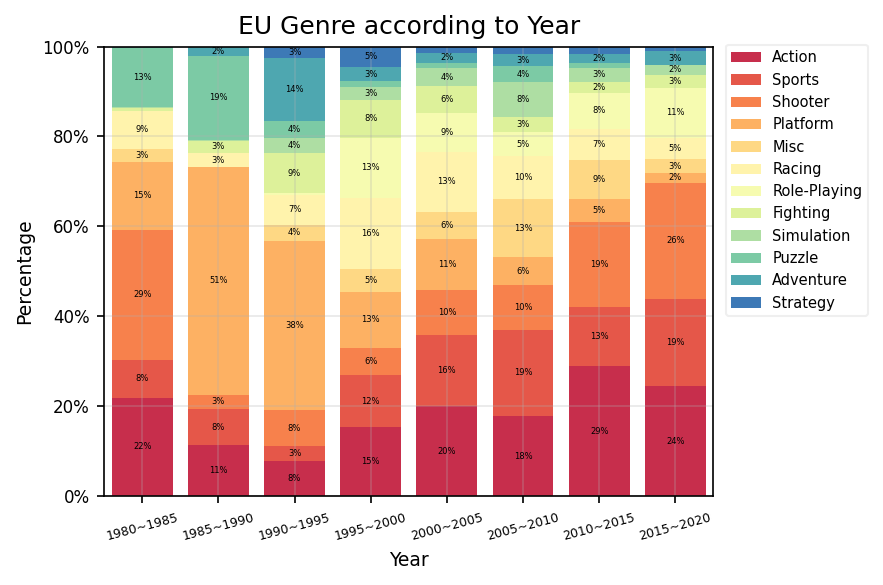

In [126]:
# 각 지역별 선호 장르를 비교하기 위해서 미국을 기준으로 장르를 오름차순으로 정리
order = ['Action', 'Sports', 'Shooter', 'Platform', 'Misc', 'Racing', 'Role-Playing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure', 'Strategy']
colormap = sns.color_palette("Spectral", len(order)) # 위와 색을 일치시킴
year = ["{}~{}".format(i, i+5) for i in np.arange(1980,2025,5)]
year_t = dict([[y, idx] for idx, y in enumerate(year)])
stack = np.zeros(len(year))

# 지역별 장르 데이터를 비교
plt.figure()
plt.gcf().set_dpi(150)
plt.title("EU Genre according to Year")
for idx, gen in enumerate(order):
  temp = year_genre_region_data_melt_EU.loc[year_genre_region_data_melt_EU["Genre"] == gen, ["Year", "Percentage"]]
  bar = plt.bar(year, temp.values[:,1], bottom = stack, color = colormap[idx], label = "{}".format(gen), width = 0.8)
  for idx, p in enumerate(bar.patches):
    if p.get_height()*100 > 2 :
      plt.annotate("{:,.0f}%".format(p.get_height()*100), (p.get_x() + p.get_width()/2., stack[idx]+ p.get_height()/2.),
                   ha = "center", va = "center", fontsize = 4, color = "k")
  for y, p in temp.values:
    stack[year_t[y]] += p
plt.xlabel("Year", fontsize = 9)
plt.ylabel("Percentage", fontsize = 9)
plt.xticks(fontsize = 6, rotation = 15)
plt.yticks(np.arange(0, 1.2, 0.2), ["{:,.0f}%".format(i*100) for i in np.arange(0, 1.2, 0.2)], fontsize = 8)
plt.xlim(-0.5,7.5)
plt.ylim(0,1)
plt.grid(alpha = 0.3)
plt.legend(loc = (1.02, 0.4), framealpha = 0.3, fontsize = 7)
plt.tight_layout()
plt.show()

### 일본의 연도별 장르 판매량의 합 분포

In [54]:
year_genre_region_data_melt_JP = year_genre_region_data_melt[year_genre_region_data_melt["Region"] == "JP_Sales"]
year_genre_region_data_melt_JP

,Year,Genre,Region,Sale,Percentage
216,1980~1985,Action,JP_Sales,0.83,0.037103
217,1980~1985,Adventure,JP_Sales,0.00,0.000000
218,1980~1985,Fighting,JP_Sales,0.00,0.000000
219,1980~1985,Misc,JP_Sales,3.58,0.160036
220,1980~1985,Platform,JP_Sales,4.31,0.192669
...,...,...,...,...,...
319,2020~2025,Role-Playing,JP_Sales,0.00,NaN
320,2020~2025,Shooter,JP_Sales,0.00,NaN
321,2020~2025,Simulation,JP_Sales,0.00,NaN
322,2020~2025,Sports,JP_Sales,0.00,NaN


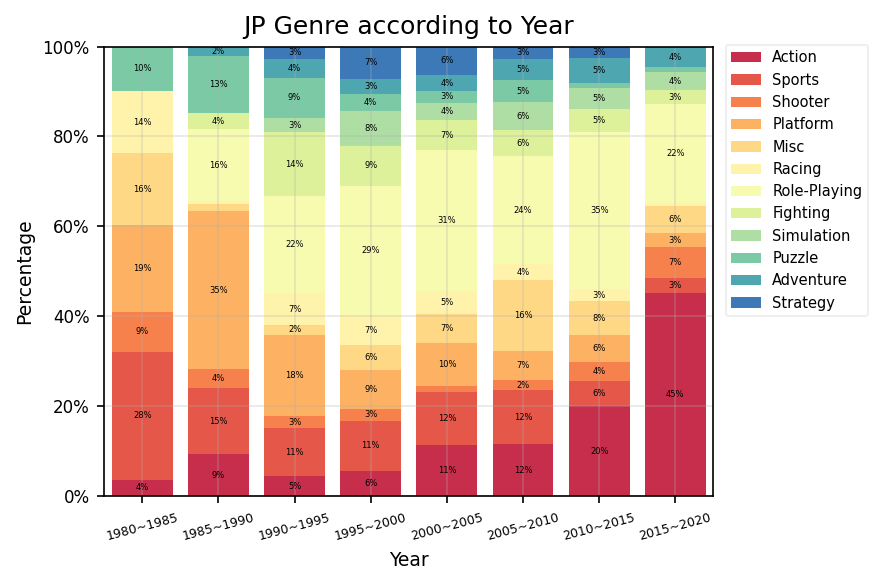

In [130]:
# 각 지역별 선호 장르를 비교하기 위해서 미국을 기준으로 장르를 오름차순으로 정리
order = ['Action', 'Sports', 'Shooter', 'Platform', 'Misc', 'Racing', 'Role-Playing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure', 'Strategy']
colormap = sns.color_palette("Spectral", len(order)) # 위와 색을 일치시킴
year = ["{}~{}".format(i, i+5) for i in np.arange(1980,2025,5)]
year_t = dict([[y, idx] for idx, y in enumerate(year)])
stack = np.zeros(len(year))

# 지역별 장르 데이터를 비교
plt.figure()
plt.gcf().set_dpi(150)
plt.title("JP Genre according to Year")
for idx, gen in enumerate(order):
  temp = year_genre_region_data_melt_JP.loc[year_genre_region_data_melt_JP["Genre"] == gen, ["Year", "Percentage"]]
  bar = plt.bar(year, temp.values[:,1], bottom = stack, color = colormap[idx], label = "{}".format(gen), width = 0.8)
  for idx, p in enumerate(bar.patches):
    if p.get_height()*100 > 2 :
      plt.annotate("{:,.0f}%".format(p.get_height()*100), (p.get_x() + p.get_width()/2., stack[idx]+ p.get_height()/2.),
                   ha = "center", va = "center", fontsize = 4, color = "k")
  for y, p in temp.values:
    stack[year_t[y]] += p
plt.xlabel("Year", fontsize = 9)
plt.ylabel("Percentage", fontsize = 9)
plt.xticks(fontsize = 6, rotation = 15)
plt.yticks(np.arange(0, 1.2, 0.2), ["{:,.0f}%".format(i*100) for i in np.arange(0, 1.2, 0.2)] ,fontsize = 8)
plt.xlim(-0.5,7.5)
plt.ylim(0,1)
plt.grid(alpha = 0.3)
plt.legend(loc = (1.02, 0.4), framealpha = 0.3, fontsize = 7)
plt.tight_layout()
plt.show()

### 나머지 국가의 연도별 장르 판매량의 합 분포

In [56]:
year_genre_region_data_melt_Other = year_genre_region_data_melt[year_genre_region_data_melt["Region"] == "Other_Sales"]
year_genre_region_data_melt_Other

,Year,Genre,Region,Sale,Percentage
324,1980~1985,Action,Other_Sales,0.22,0.139241
325,1980~1985,Adventure,Other_Sales,0.00,0.000000
326,1980~1985,Fighting,Other_Sales,0.01,0.006329
327,1980~1985,Misc,Other_Sales,0.03,0.018987
328,1980~1985,Platform,Other_Sales,0.22,0.139241
...,...,...,...,...,...
427,2020~2025,Role-Playing,Other_Sales,0.00,0.000000
428,2020~2025,Shooter,Other_Sales,0.00,0.000000
429,2020~2025,Simulation,Other_Sales,0.02,1.000000
430,2020~2025,Sports,Other_Sales,0.00,0.000000


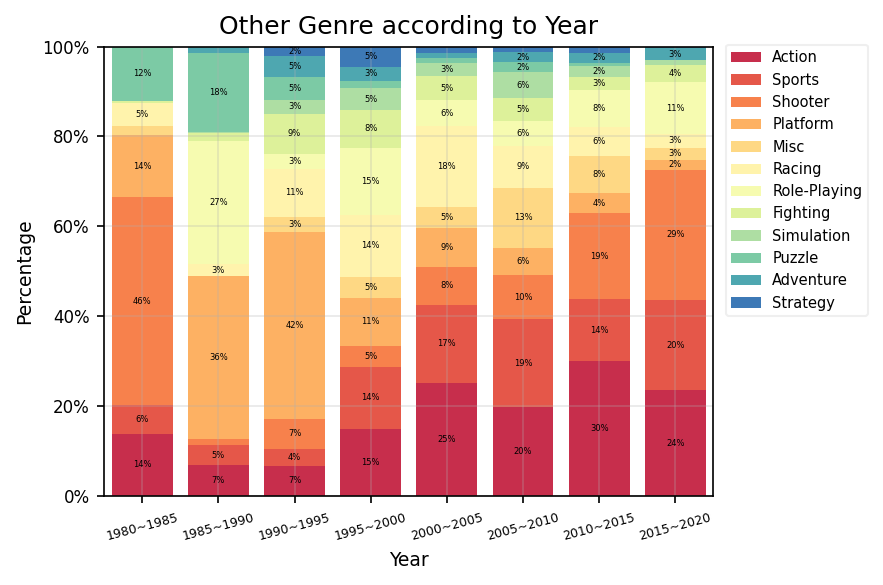

In [131]:
# 각 지역별 선호 장르를 비교하기 위해서 미국을 기준으로 장르를 오름차순으로 정리
order = ['Action', 'Sports', 'Shooter', 'Platform', 'Misc', 'Racing', 'Role-Playing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure', 'Strategy']
colormap = sns.color_palette("Spectral", len(order)) # 위와 색을 일치시킴
year = ["{}~{}".format(i, i+5) for i in np.arange(1980,2025,5)]
year_t = dict([[y, idx] for idx, y in enumerate(year)])
stack = np.zeros(len(year))

# 지역별 장르 데이터를 비교
plt.figure()
plt.gcf().set_dpi(150)
plt.title("Other Genre according to Year")
for idx, gen in enumerate(order):
  temp = year_genre_region_data_melt_Other.loc[year_genre_region_data_melt_Other["Genre"] == gen, ["Year", "Percentage"]]
  bar = plt.bar(year, temp.values[:,1], bottom = stack, color = colormap[idx], label = "{}".format(gen), width = 0.8)
  for idx, p in enumerate(bar.patches):
    if p.get_height()*100 > 2 :
      plt.annotate("{:,.0f}%".format(p.get_height()*100), (p.get_x() + p.get_width()/2., stack[idx]+ p.get_height()/2.),
                   ha = "center", va = "center", fontsize = 4, color = "k")
  for y, p in temp.values:
    stack[year_t[y]] += p
plt.xlabel("Year", fontsize = 9)
plt.ylabel("Percentage", fontsize = 9)
plt.xticks(fontsize = 6, rotation = 15)
plt.yticks(np.arange(0, 1.2, 0.2), ["{:,.0f}%".format(i*100) for i in np.arange(0, 1.2, 0.2)] ,fontsize = 8)
plt.xlim(-0.5,7.5)
plt.ylim(0,1)
plt.grid(alpha = 0.3)
plt.legend(loc = (1.02, 0.4), framealpha = 0.3, fontsize = 7)
plt.tight_layout()
plt.show()

### 전세계의 연도별 장르 판매량의 중앙값 분포

In [58]:
# 연도별 장르를 비교하기 위해서 데이터 전처리
data_temp = data.copy()
bins = np.arange(1980,2030,5)
labels = ["{}~{}".format(i, i+5) for i in np.arange(1980,2025,5)]
data_temp["Year"] = pd.cut(data_temp["Year"], bins = bins, labels = labels, right = False)
year_genre_region_data_m = data_temp.groupby(["Year", "Genre"])[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].median().reset_index()
year_genre_region_data_m["Total_Sale"] = year_genre_region_data_m.iloc[:,2:].sum(axis = 1)
year_genre_region_data_m_melt = year_genre_region_data_m.melt(id_vars = ["Year", "Genre"], var_name = "Region", value_name = "Sale")
year_genre_region_data_m_melt

,Year,Genre,Region,Sale
0,1980~1985,Action,NA_Sales,0.350
1,1980~1985,Adventure,NA_Sales,0.380
2,1980~1985,Fighting,NA_Sales,0.720
3,1980~1985,Misc,NA_Sales,0.250
4,1980~1985,Platform,NA_Sales,0.785
...,...,...,...,...
535,2020~2025,Role-Playing,Total_Sale,0.000
536,2020~2025,Shooter,Total_Sale,0.000
537,2020~2025,Simulation,Total_Sale,0.290
538,2020~2025,Sports,Total_Sale,0.000


In [59]:
# 연도별 데이터의 분균일로 백분위로 바꾸어 분석하기위한 전처리
year_genre_region_data_m_melt["Percentage"] = year_genre_region_data_m_melt.groupby(["Year", "Region"])[["Sale"]].apply(lambda x : x/x.sum())
year_genre_region_data_m_melt

,Year,Genre,Region,Sale,Percentage
0,1980~1985,Action,NA_Sales,0.350,0.069238
1,1980~1985,Adventure,NA_Sales,0.380,0.075173
2,1980~1985,Fighting,NA_Sales,0.720,0.142433
3,1980~1985,Misc,NA_Sales,0.250,0.049456
4,1980~1985,Platform,NA_Sales,0.785,0.155292
...,...,...,...,...,...
535,2020~2025,Role-Playing,Total_Sale,0.000,0.000000
536,2020~2025,Shooter,Total_Sale,0.000,0.000000
537,2020~2025,Simulation,Total_Sale,0.290,1.000000
538,2020~2025,Sports,Total_Sale,0.000,0.000000


In [60]:
# 전체의 시간에 따른 백분위 전처리
year_genre_region_data_m_melt_total = year_genre_region_data_m_melt[year_genre_region_data_melt["Region"] == "Total_Sale"].reset_index(drop = True)
year_genre_region_data_m_melt_total

,Year,Genre,Region,Sale,Percentage
0,1980~1985,Action,Total_Sale,0.37,0.067334
1,1980~1985,Adventure,Total_Sale,0.40,0.072793
2,1980~1985,Fighting,Total_Sale,0.77,0.140127
3,1980~1985,Misc,Total_Sale,0.27,0.049136
4,1980~1985,Platform,Total_Sale,0.86,0.156506
...,...,...,...,...,...
103,2020~2025,Role-Playing,Total_Sale,0.00,0.000000
104,2020~2025,Shooter,Total_Sale,0.00,0.000000
105,2020~2025,Simulation,Total_Sale,0.29,1.000000
106,2020~2025,Sports,Total_Sale,0.00,0.000000


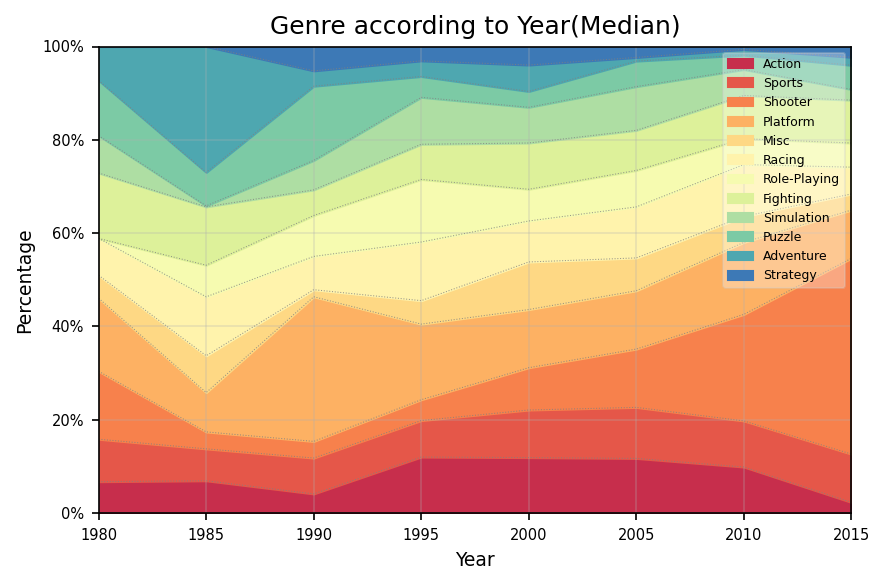

In [61]:
# 각 지역별 선호 장르를 비교하기 위해서 미국을 기준으로 장르를 오름차순으로 정리
order = ['Action', 'Sports', 'Shooter', 'Platform', 'Misc', 'Racing', 'Role-Playing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure', 'Strategy']
colormap = sns.color_palette("Spectral", len(order)) # 위와 색을 일치시킴
year = ["{}~{}".format(i, i+5) for i in np.arange(1980,2025,5)]
year_t = dict([[y, idx] for idx, y in enumerate(year)])
stack = np.zeros(len(year))
stack_temp = np.zeros(len(year))

# 지역별 장르 데이터를 비교
plt.figure()
plt.gcf().set_dpi(150)
plt.title("Genre according to Year(Median)")
for idx, gen in enumerate(order):
  temp = year_genre_region_data_m_melt_total.loc[year_genre_region_data_m_melt_total["Genre"] == gen, ["Year", "Percentage"]]
  for y, p in temp.values:
    stack_temp[year_t[y]] += p
  plt.fill_between(np.arange(1980,2025,5), y1 = stack, y2 = stack_temp, color = colormap[idx], label = "{}".format(gen), alpha = 1)
  plt.plot(np.arange(1980,2025,5), stack, color = "grey", linewidth = 0.5, linestyle = "dotted", alpha = 0.8)
  stack = stack_temp.copy()
plt.xlabel("Year", fontsize = 9)
plt.ylabel("Percentage", fontsize = 9)
plt.xticks(fontsize = 7)
plt.yticks(np.arange(0, 1.2, 0.2), ["{:,.0f}%".format(i*100) for i in np.arange(0, 1.2, 0.2)] ,fontsize = 7)
plt.xlim(1980,2015)
plt.ylim(0,1)
plt.grid(alpha = 0.3)
plt.legend(loc = "upper right", framealpha = 0.3, fontsize = 6)
plt.tight_layout()
plt.show()

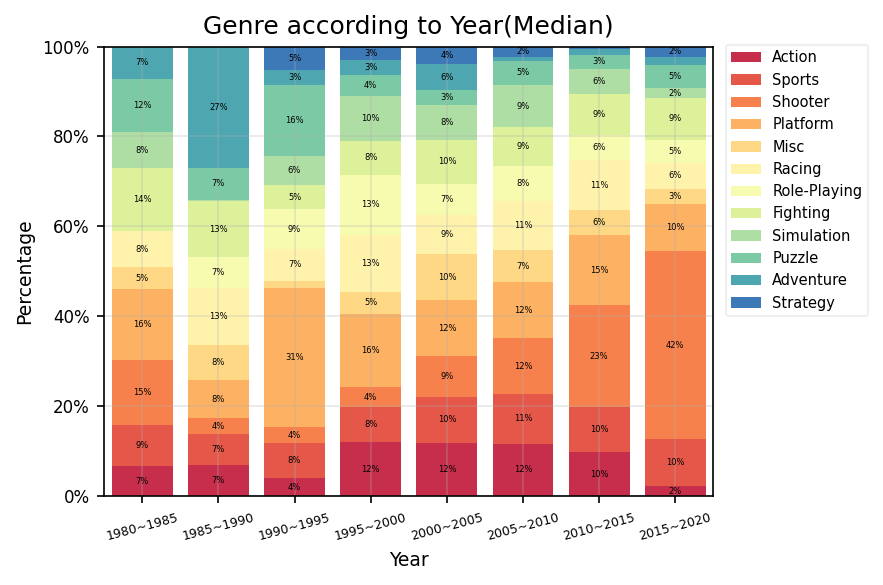

In [132]:
# 각 지역별 선호 장르를 비교하기 위해서 미국을 기준으로 장르를 오름차순으로 정리
order = ['Action', 'Sports', 'Shooter', 'Platform', 'Misc', 'Racing', 'Role-Playing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure', 'Strategy']
colormap = sns.color_palette("Spectral", len(order)) # 위와 색을 일치시킴
year = ["{}~{}".format(i, i+5) for i in np.arange(1980,2025,5)]
year_t = dict([[y, idx] for idx, y in enumerate(year)])
stack = np.zeros(len(year))

# 지역별 장르 데이터를 비교
plt.figure()
plt.gcf().set_dpi(150)
plt.title("Genre according to Year(Median)")
for idx, gen in enumerate(order):
  temp = year_genre_region_data_m_melt_total.loc[year_genre_region_data_m_melt_total["Genre"] == gen, ["Year", "Percentage"]]
  bar = plt.bar(year, temp.values[:,1], bottom = stack, color = colormap[idx], label = "{}".format(gen), width = 0.8)
  for idx, p in enumerate(bar.patches):
    if p.get_height()*100 > 2 :
      plt.annotate("{:,.0f}%".format(p.get_height()*100), (p.get_x() + p.get_width()/2., stack[idx]+ p.get_height()/2.),
                   ha = "center", va = "center", fontsize = 4, color = "k")
  for y, p in temp.values:
    stack[year_t[y]] += p
plt.xlabel("Year", fontsize = 9)
plt.ylabel("Percentage", fontsize = 9)
plt.xticks(fontsize = 6, rotation = 15)
plt.yticks(np.arange(0, 1.2, 0.2), ["{:,.0f}%".format(i*100) for i in np.arange(0, 1.2, 0.2)] ,fontsize = 8)
plt.xlim(-0.5, 7.5)
plt.ylim(0, 1)
plt.grid(alpha = 0.3)
plt.legend(loc = (1.02, 0.4), framealpha = 0.3, fontsize = 7)
plt.tight_layout()
plt.show()

### 미국의 연도별 장르 판매량의 중앙값 분포

In [63]:
# 전체의 시간에 따른 백분위 전처리
year_genre_region_data_m_melt_NA = year_genre_region_data_m_melt[year_genre_region_data_melt["Region"] == "NA_Sales"].reset_index(drop = True)
year_genre_region_data_m_melt_NA

,Year,Genre,Region,Sale,Percentage
0,1980~1985,Action,NA_Sales,0.350,0.069238
1,1980~1985,Adventure,NA_Sales,0.380,0.075173
2,1980~1985,Fighting,NA_Sales,0.720,0.142433
3,1980~1985,Misc,NA_Sales,0.250,0.049456
4,1980~1985,Platform,NA_Sales,0.785,0.155292
...,...,...,...,...,...
103,2020~2025,Role-Playing,NA_Sales,NaN,NaN
104,2020~2025,Shooter,NA_Sales,NaN,NaN
105,2020~2025,Simulation,NA_Sales,0.270,1.000000
106,2020~2025,Sports,NA_Sales,NaN,NaN


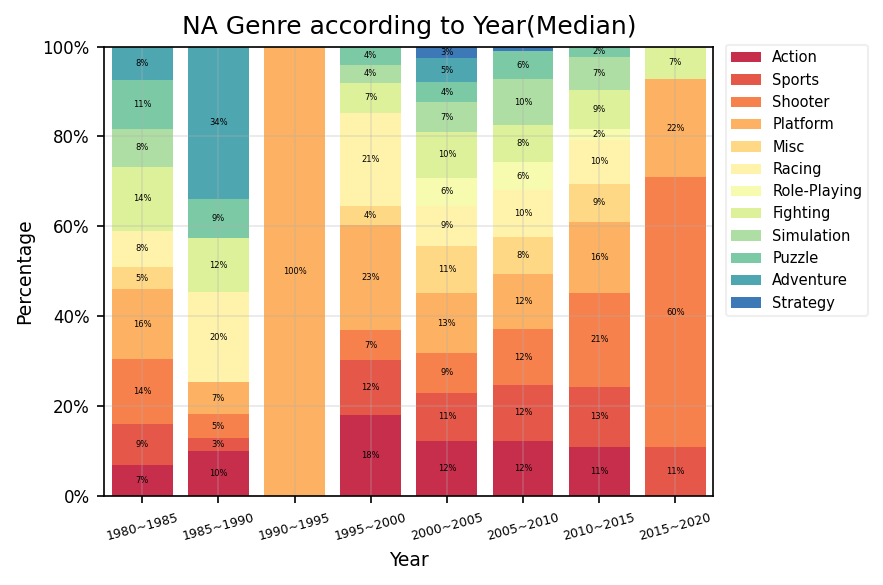

In [133]:
# 각 지역별 선호 장르를 비교하기 위해서 미국을 기준으로 장르를 오름차순으로 정리
order = ['Action', 'Sports', 'Shooter', 'Platform', 'Misc', 'Racing', 'Role-Playing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure', 'Strategy']
colormap = sns.color_palette("Spectral", len(order)) # 위와 색을 일치시킴
year = ["{}~{}".format(i, i+5) for i in np.arange(1980,2025,5)]
year_t = dict([[y, idx] for idx, y in enumerate(year)])
stack = np.zeros(len(year))

# 지역별 장르 데이터를 비교
plt.figure()
plt.gcf().set_dpi(150)
plt.title("NA Genre according to Year(Median)")
for idx, gen in enumerate(order):
  temp = year_genre_region_data_m_melt_NA.loc[year_genre_region_data_m_melt_NA["Genre"] == gen, ["Year", "Percentage"]]
  temp["Percentage"] = temp["Percentage"].fillna(0)
  bar = plt.bar(year, temp.values[:,1], bottom = stack, color = colormap[idx], label = "{}".format(gen), width = 0.8)
  for idx, p in enumerate(bar.patches):
    if p.get_height()*100 > 2 :
      plt.annotate("{:,.0f}%".format(p.get_height()*100), (p.get_x() + p.get_width()/2., stack[idx]+ p.get_height()/2.),
                   ha = "center", va = "center", fontsize = 4, color = "k")
  for y, p in temp.values:
    stack[year_t[y]] += p
plt.xlabel("Year", fontsize = 9)
plt.ylabel("Percentage", fontsize = 9)
plt.xticks(fontsize = 6, rotation = 15)
plt.yticks(np.arange(0, 1.2, 0.2), ["{:,.0f}%".format(i*100) for i in np.arange(0, 1.2, 0.2)] ,fontsize = 8)
plt.xlim(-0.5, 7.5)
plt.ylim(0,1)
plt.grid(alpha = 0.3)
plt.legend(loc = (1.02, 0.4), framealpha = 0.3, fontsize = 7)
plt.tight_layout()
plt.show()

### 유럽의 연도별 장르 판매량의 중앙값 분포

In [65]:
year_genre_region_data_m_melt_EU = year_genre_region_data_m_melt[year_genre_region_data_melt["Region"] == "EU_Sales"].reset_index(drop = True)
year_genre_region_data_m_melt_EU

,Year,Genre,Region,Sale,Percentage
0,1980~1985,Action,EU_Sales,0.020,0.052632
1,1980~1985,Adventure,EU_Sales,0.020,0.052632
2,1980~1985,Fighting,EU_Sales,0.040,0.105263
3,1980~1985,Misc,EU_Sales,0.020,0.052632
4,1980~1985,Platform,EU_Sales,0.065,0.171053
...,...,...,...,...,...
103,2020~2025,Role-Playing,EU_Sales,NaN,NaN
104,2020~2025,Shooter,EU_Sales,NaN,NaN
105,2020~2025,Simulation,EU_Sales,0.000,NaN
106,2020~2025,Sports,EU_Sales,NaN,NaN


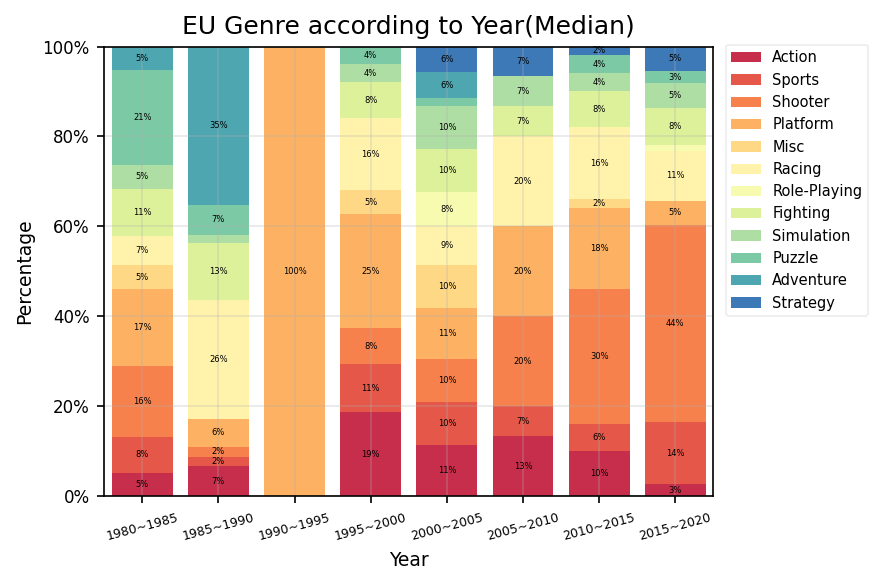

In [134]:
# 각 지역별 선호 장르를 비교하기 위해서 미국을 기준으로 장르를 오름차순으로 정리
order = ['Action', 'Sports', 'Shooter', 'Platform', 'Misc', 'Racing', 'Role-Playing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure', 'Strategy']
colormap = sns.color_palette("Spectral", len(order)) # 위와 색을 일치시킴
year = ["{}~{}".format(i, i+5) for i in np.arange(1980,2025,5)]
year_t = dict([[y, idx] for idx, y in enumerate(year)])
stack = np.zeros(len(year))

# 지역별 장르 데이터를 비교
plt.figure()
plt.gcf().set_dpi(150)
plt.title("EU Genre according to Year(Median)")
for idx, gen in enumerate(order):
  temp = year_genre_region_data_m_melt_EU.loc[year_genre_region_data_m_melt_EU["Genre"] == gen, ["Year", "Percentage"]]
  temp["Percentage"] = temp["Percentage"].fillna(0)
  bar = plt.bar(year, temp.values[:,1], bottom = stack, color = colormap[idx], label = "{}".format(gen), width = 0.8)
  for idx, p in enumerate(bar.patches):
    if p.get_height()*100 > 2 :
      plt.annotate("{:,.0f}%".format(p.get_height()*100), (p.get_x() + p.get_width()/2., stack[idx]+ p.get_height()/2.),
                   ha = "center", va = "center", fontsize = 4, color = "k")
  for y, p in temp.values:
    stack[year_t[y]] += p
plt.xlabel("Year", fontsize = 9)
plt.ylabel("Percentage", fontsize = 9)
plt.xticks(fontsize = 6, rotation = 15)
plt.yticks(np.arange(0, 1.2, 0.2), ["{:,.0f}%".format(i*100) for i in np.arange(0, 1.2, 0.2)] ,fontsize = 8)
plt.xlim(-0.5, 7.5)
plt.ylim(0,1)
plt.grid(alpha = 0.3)
plt.legend(loc = (1.02, 0.4), framealpha = 0.3, fontsize = 7)
plt.tight_layout()
plt.show()

### 일본의 연도별 장르 판매량의 중앙값 분포

In [67]:
year_genre_region_data_m_melt_JP = year_genre_region_data_m_melt[year_genre_region_data_melt["Region"] == "JP_Sales"].reset_index(drop = True)
year_genre_region_data_m_melt_JP

,Year,Genre,Region,Sale,Percentage
0,1980~1985,Action,JP_Sales,0.0,NaN
1,1980~1985,Adventure,JP_Sales,0.0,NaN
2,1980~1985,Fighting,JP_Sales,0.0,NaN
3,1980~1985,Misc,JP_Sales,0.0,NaN
4,1980~1985,Platform,JP_Sales,0.0,NaN
...,...,...,...,...,...
103,2020~2025,Role-Playing,JP_Sales,NaN,NaN
104,2020~2025,Shooter,JP_Sales,NaN,NaN
105,2020~2025,Simulation,JP_Sales,0.0,NaN
106,2020~2025,Sports,JP_Sales,NaN,NaN


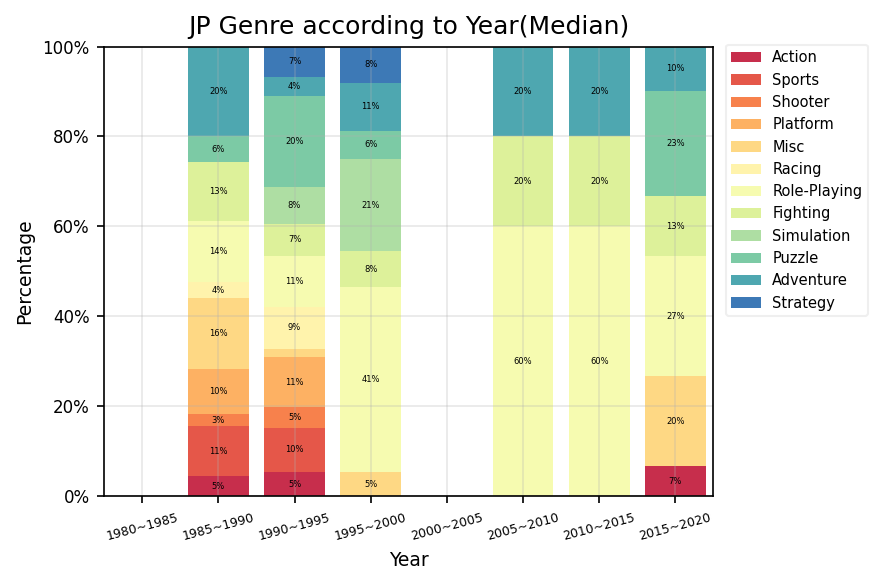

In [135]:
# 각 지역별 선호 장르를 비교하기 위해서 미국을 기준으로 장르를 오름차순으로 정리
order = ['Action', 'Sports', 'Shooter', 'Platform', 'Misc', 'Racing', 'Role-Playing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure', 'Strategy']
colormap = sns.color_palette("Spectral", len(order)) # 위와 색을 일치시킴
year = ["{}~{}".format(i, i+5) for i in np.arange(1980,2025,5)]
year_t = dict([[y, idx] for idx, y in enumerate(year)])
stack = np.zeros(len(year))

# 지역별 장르 데이터를 비교
plt.figure()
plt.gcf().set_dpi(150)
plt.title("JP Genre according to Year(Median)")
for idx, gen in enumerate(order):
  temp = year_genre_region_data_m_melt_JP.loc[year_genre_region_data_m_melt_JP["Genre"] == gen, ["Year", "Percentage"]]
  temp["Percentage"] = temp["Percentage"].fillna(0)
  bar = plt.bar(year, temp.values[:,1], bottom = stack, color = colormap[idx], label = "{}".format(gen), width = 0.8)
  for idx, p in enumerate(bar.patches):
    if p.get_height()*100 > 2 :
      plt.annotate("{:,.0f}%".format(p.get_height()*100), (p.get_x() + p.get_width()/2., stack[idx]+ p.get_height()/2.),
                   ha = "center", va = "center", fontsize = 4, color = "k")
  for y, p in temp.values:
    stack[year_t[y]] += p
plt.xlabel("Year", fontsize = 9)
plt.ylabel("Percentage", fontsize = 9)
plt.xticks(fontsize = 6, rotation = 15)
plt.yticks(np.arange(0, 1.2, 0.2), ["{:,.0f}%".format(i*100) for i in np.arange(0, 1.2, 0.2)] ,fontsize = 8)
plt.xlim(-0.5, 7.5)
plt.ylim(0,1)
plt.grid(alpha = 0.3)
plt.legend(loc = (1.02, 0.4), framealpha = 0.3, fontsize = 7)
plt.tight_layout()
plt.show()

### 나머지 국가의 연도별 장르 판매량의 중앙값 분포

In [69]:
year_genre_region_data_m_melt_Other = year_genre_region_data_m_melt[year_genre_region_data_melt["Region"] == "Other_Sales"].reset_index(drop = True)
year_genre_region_data_m_melt_Other

,Year,Genre,Region,Sale,Percentage
0,1980~1985,Action,Other_Sales,0.00,0.000000
1,1980~1985,Adventure,Other_Sales,0.00,0.000000
2,1980~1985,Fighting,Other_Sales,0.01,0.166667
3,1980~1985,Misc,Other_Sales,0.00,0.000000
4,1980~1985,Platform,Other_Sales,0.01,0.166667
...,...,...,...,...,...
103,2020~2025,Role-Playing,Other_Sales,NaN,NaN
104,2020~2025,Shooter,Other_Sales,NaN,NaN
105,2020~2025,Simulation,Other_Sales,0.02,1.000000
106,2020~2025,Sports,Other_Sales,NaN,NaN


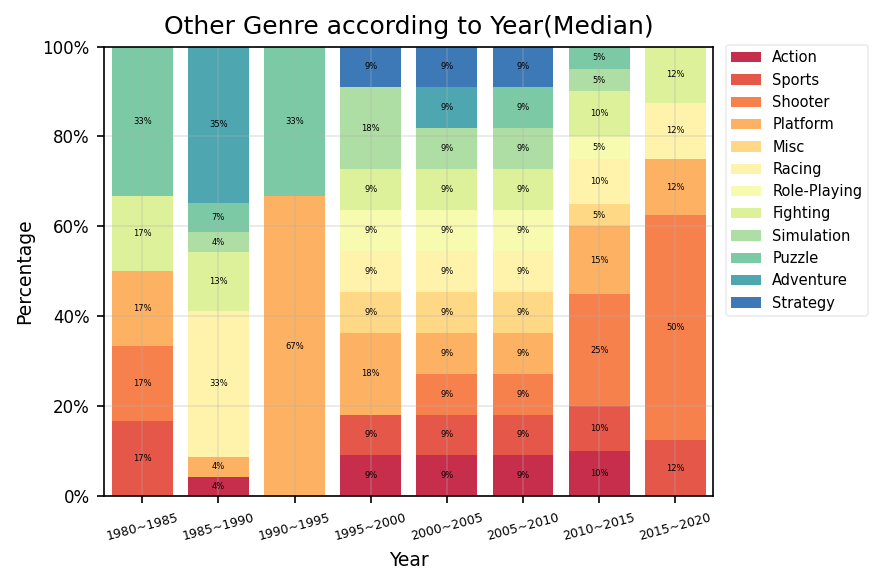

In [136]:
# 각 지역별 선호 장르를 비교하기 위해서 미국을 기준으로 장르를 오름차순으로 정리
order = ['Action', 'Sports', 'Shooter', 'Platform', 'Misc', 'Racing', 'Role-Playing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure', 'Strategy']
colormap = sns.color_palette("Spectral", len(order)) # 위와 색을 일치시킴
year = ["{}~{}".format(i, i+5) for i in np.arange(1980,2025,5)]
year_t = dict([[y, idx] for idx, y in enumerate(year)])
stack = np.zeros(len(year))

# 지역별 장르 데이터를 비교
plt.figure()
plt.gcf().set_dpi(150)
plt.title("Other Genre according to Year(Median)")
for idx, gen in enumerate(order):
  temp = year_genre_region_data_m_melt_Other.loc[year_genre_region_data_m_melt_Other["Genre"] == gen, ["Year", "Percentage"]]
  temp["Percentage"] = temp["Percentage"].fillna(0)
  bar = plt.bar(year, temp.values[:,1], bottom = stack, color = colormap[idx], label = "{}".format(gen), width = 0.8)
  for idx, p in enumerate(bar.patches):
    if p.get_height()*100 > 2 :
      plt.annotate("{:,.0f}%".format(p.get_height()*100), (p.get_x() + p.get_width()/2., stack[idx]+ p.get_height()/2.),
                   ha = "center", va = "center", fontsize = 4, color = "k")
  for y, p in temp.values:
    stack[year_t[y]] += p
plt.xlabel("Year", fontsize = 9)
plt.ylabel("Percentage", fontsize = 9)
plt.xticks(fontsize = 6, rotation = 15)
plt.yticks(np.arange(0, 1.2, 0.2), ["{:,.0f}%".format(i*100) for i in np.arange(0, 1.2, 0.2)] ,fontsize = 8)
plt.xlim(-0.5, 7.5)
plt.ylim(0,1)
plt.grid(alpha = 0.3)
plt.legend(loc = (1.02, 0.4), framealpha = 0.3, fontsize = 7)
plt.tight_layout()
plt.show()

### 전세계의 연도별 장르 발매량 분포

In [71]:
# 연도별 장르를 비교하기 위해서 데이터 전처리
data_temp = data.copy()
bins = np.arange(1980,2030,5)
labels = ["{}~{}".format(i, i+5) for i in np.arange(1980,2025,5)]
data_temp["Year"] = pd.cut(data_temp["Year"], bins = bins, labels = labels, right = False)
data_temp = data_temp.replace(0, np.nan)
year_genre_region_data_c = data_temp.groupby(["Year", "Genre"])[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].count().reset_index()
year_genre_region_data_c["Total_Sale"] = year_genre_region_data_c.iloc[:,2:].sum(axis = 1)
year_genre_region_data_c_melt = year_genre_region_data_c.melt(id_vars = ["Year", "Genre"], var_name = "Region", value_name = "Count")
year_genre_region_data_c_melt

,Year,Genre,Region,Count
0,1980~1985,Action,NA_Sales,52
1,1980~1985,Adventure,NA_Sales,1
2,1980~1985,Fighting,NA_Sales,1
3,1980~1985,Misc,NA_Sales,6
4,1980~1985,Platform,NA_Sales,13
...,...,...,...,...
535,2020~2025,Role-Playing,Total_Sale,0
536,2020~2025,Shooter,Total_Sale,0
537,2020~2025,Simulation,Total_Sale,2
538,2020~2025,Sports,Total_Sale,0


In [72]:
# 연도별 데이터의 분균일로 백분위로 바꾸어 분석하기위한 전처리
year_genre_region_data_c_melt["Percentage"] = year_genre_region_data_c_melt.groupby(["Year", "Region"])[["Count"]].apply(lambda x : x/x.sum())
year_genre_region_data_c_melt

,Year,Genre,Region,Count,Percentage
0,1980~1985,Action,NA_Sales,52,0.444444
1,1980~1985,Adventure,NA_Sales,1,0.008547
2,1980~1985,Fighting,NA_Sales,1,0.008547
3,1980~1985,Misc,NA_Sales,6,0.051282
4,1980~1985,Platform,NA_Sales,13,0.111111
...,...,...,...,...,...
535,2020~2025,Role-Playing,Total_Sale,0,0.000000
536,2020~2025,Shooter,Total_Sale,0,0.000000
537,2020~2025,Simulation,Total_Sale,2,1.000000
538,2020~2025,Sports,Total_Sale,0,0.000000


In [73]:
year_genre_region_data_c_melt_Total = year_genre_region_data_c_melt[year_genre_region_data_melt["Region"] == "Total_Sale"].reset_index(drop = True)
year_genre_region_data_c_melt_Total

,Year,Genre,Region,Count,Percentage
0,1980~1985,Action,Total_Sale,123,0.384375
1,1980~1985,Adventure,Total_Sale,2,0.006250
2,1980~1985,Fighting,Total_Sale,3,0.009375
3,1980~1985,Misc,Total_Sale,16,0.050000
4,1980~1985,Platform,Total_Sale,44,0.137500
...,...,...,...,...,...
103,2020~2025,Role-Playing,Total_Sale,0,0.000000
104,2020~2025,Shooter,Total_Sale,0,0.000000
105,2020~2025,Simulation,Total_Sale,2,1.000000
106,2020~2025,Sports,Total_Sale,0,0.000000


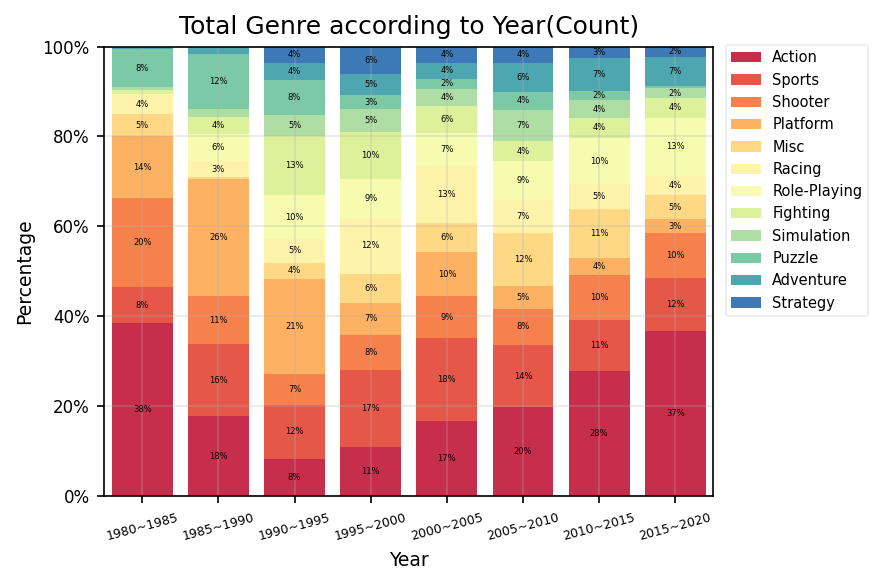

In [137]:
# 각 지역별 선호 장르를 비교하기 위해서 미국을 기준으로 장르를 오름차순으로 정리
order = ['Action', 'Sports', 'Shooter', 'Platform', 'Misc', 'Racing', 'Role-Playing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure', 'Strategy']
colormap = sns.color_palette("Spectral", len(order)) # 위와 색을 일치시킴
year = ["{}~{}".format(i, i+5) for i in np.arange(1980,2025,5)]
year_t = dict([[y, idx] for idx, y in enumerate(year)])
stack = np.zeros(len(year))

# 지역별 장르 데이터를 비교
plt.figure()
plt.gcf().set_dpi(150)
plt.title("Total Genre according to Year(Count)")
for idx, gen in enumerate(order):
  temp = year_genre_region_data_c_melt_Total.loc[year_genre_region_data_c_melt_Total["Genre"] == gen, ["Year", "Percentage"]]
  temp["Percentage"] = temp["Percentage"].fillna(0)
  bar = plt.bar(year, temp.values[:,1], bottom = stack, color = colormap[idx], label = "{}".format(gen), width = 0.8)
  for idx, p in enumerate(bar.patches):
    if p.get_height()*100 > 2 :
      plt.annotate("{:,.0f}%".format(p.get_height()*100), (p.get_x() + p.get_width()/2., stack[idx]+ p.get_height()/2.),
                   ha = "center", va = "center", fontsize = 4, color = "k")
  for y, p in temp.values:
    stack[year_t[y]] += p
plt.xlabel("Year", fontsize = 9)
plt.ylabel("Percentage", fontsize = 9)
plt.xticks(fontsize = 6, rotation = 15)
plt.yticks(np.arange(0, 1.2, 0.2), ["{:,.0f}%".format(i*100) for i in np.arange(0, 1.2, 0.2)] ,fontsize = 8)
plt.xlim(-0.5, 7.5)
plt.ylim(0,1)
plt.grid(alpha = 0.3)
plt.legend(loc = (1.02, 0.4), framealpha = 0.3, fontsize = 7)
plt.tight_layout()
plt.show()

## 판매량이 높은 게임의 특징

In [75]:
# 판매량이 높은 게임을 추출하기 위한 전처리
data_temp = data.copy()
data_temp["Total_Sales"] = data_temp.iloc[:,5:9].sum(axis = 1)
data_temp["Rank"] = data_temp["Total_Sales"].rank(ascending = False)
data_temp

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Rank
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,13429.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,7854.5
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,14996.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,13429.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,6550.0
...,...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,7443.5
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,15862.0
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,2558.0
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,4930.0


In [76]:
# 판매량이 상위 1% 게임 만을 추출
data_high = data_temp[data_temp["Rank"] < 163]
data_high

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Rank
119,Call of Duty 4: Modern Warfare,X360,2007,Shooter,Activision,5.91,2.38,0.13,0.90,9.32,70.0
220,Just Dance 3,Wii,2011,Misc,Ubisoft,6.05,3.15,0.00,1.07,10.27,60.0
503,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30,28.0
568,Mario Kart 64,N64,1996,Racing,Nintendo,5.55,1.94,2.23,0.15,9.87,62.0
751,Grand Theft Auto: Liberty City Stories,PSP,2005,Action,Take-Two Interactive,2.90,2.83,0.24,1.75,7.72,89.0
...,...,...,...,...,...,...,...,...,...,...,...
15637,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4.52,2.09,0.01,0.67,7.29,100.0
15925,Red Dead Redemption,PS3,2010,Action,Take-Two Interactive,2.79,2.61,0.17,1.03,6.60,122.0
16120,Grand Theft Auto IV,PS3,2008,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.58,56.0
16160,Super Mario Galaxy 2,Wii,2010,Platform,Nintendo,3.66,2.42,0.98,0.64,7.70,90.0


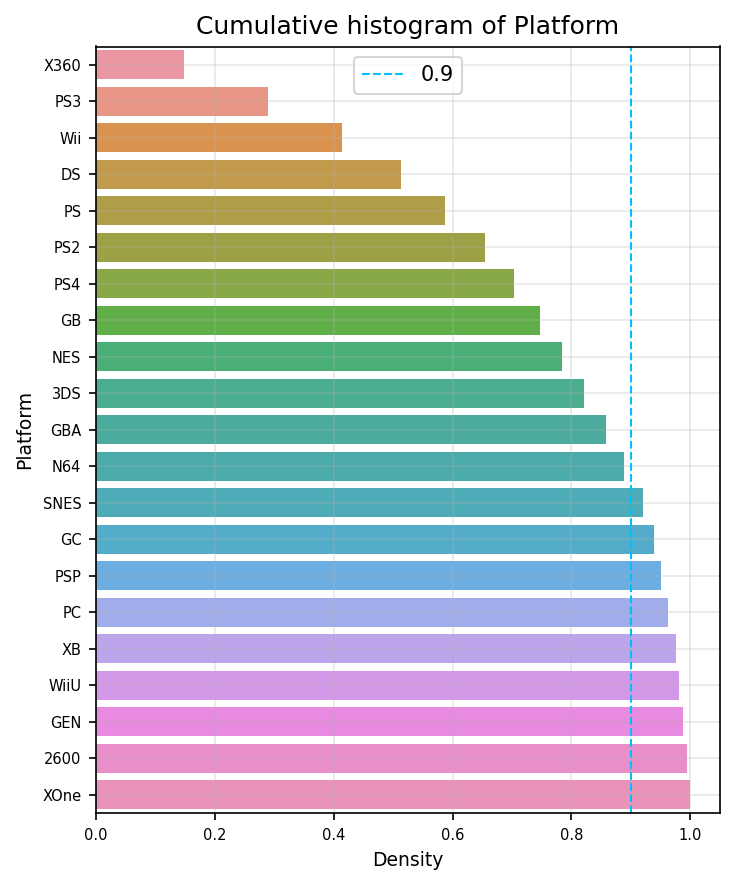

In [77]:
# 데이터에서 platform의 분포를 확인
platform_hist = data_high["Platform"].value_counts().sort_values(ascending=False)
cul_platform_hist = np.cumsum(platform_hist) # 데이터가 너무 많으므로 90%의 백분위를 차지하는 platform만 추출하기 위한 전처리

# 데이터 시각화
plt.figure(figsize = (5,6))
plt.gcf().set_dpi(150)
plt.title("Cumulative histogram of Platform")
sns.barplot(x = cul_platform_hist.values/cul_platform_hist.values[-1], y = cul_platform_hist.index)
plt.axvline(0.9, lw = 1, ls = "--", c= "deepskyblue", label = "0.9")
plt.xlabel("Density", fontsize = 9)
plt.ylabel("Platform", fontsize = 9)
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 7)
plt.grid(alpha = 0.3)
plt.legend(loc = "best")
plt.tight_layout()
plt.show()

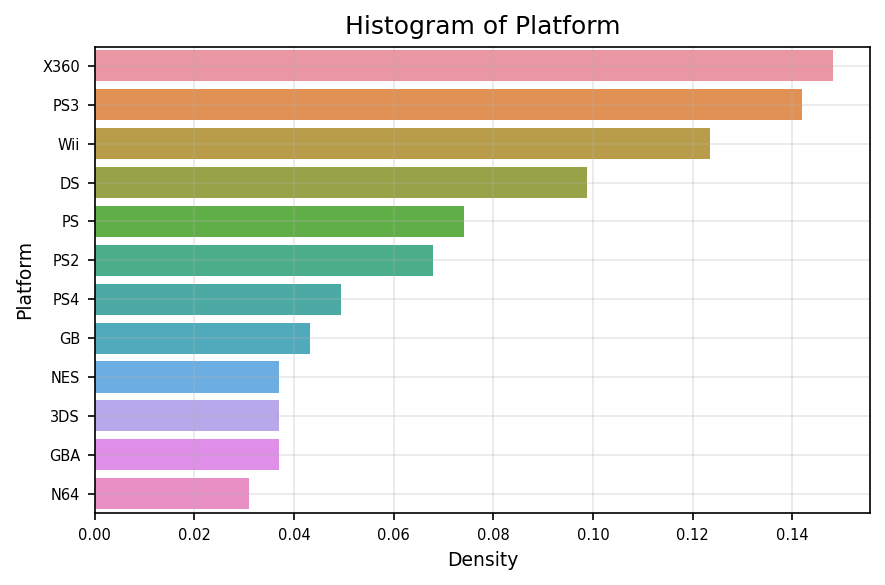

In [78]:
# 위 전처리에 의해서 90%의 백분위에 해당하는 platform만 추려서 시장의 데이터를 비교
platform_90 = len(cul_platform_hist[cul_platform_hist/cul_platform_hist[-1] < 0.9])
plt.figure()
plt.gcf().set_dpi(150)
plt.title("Histogram of Platform")
sns.barplot(x = (platform_hist.values/platform_hist.values.sum())[:platform_90], y = platform_hist.index[:platform_90])
plt.xlabel("Density", fontsize = 9)
plt.ylabel("Platform", fontsize = 9)
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 7)
plt.grid(alpha = 0.3)
plt.tight_layout()
plt.show()

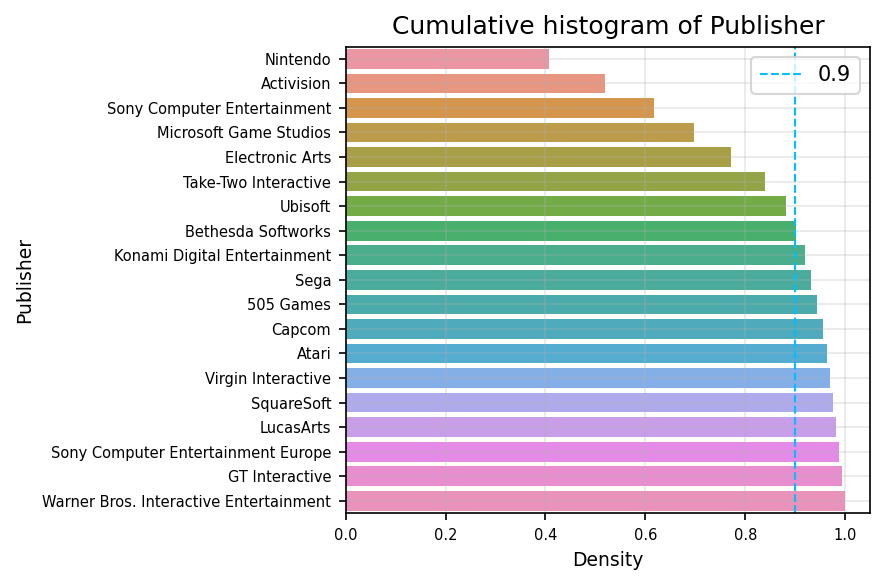

In [79]:
# 데이터에서 publisher 분포를 확인
publisher_hist = data_high["Publisher"].value_counts().sort_values(ascending=False)
cul_publisher_hist = np.cumsum(publisher_hist) # 데이터가 너무 많으므로 80%의 백분위를 차지하는 publisher만 추출하기 위한 전처리

# 데이터 시각화
plt.figure()
plt.gcf().set_dpi(150)
plt.title("Cumulative histogram of Publisher")
sns.barplot(x = cul_publisher_hist/cul_publisher_hist.values[-1], y = cul_publisher_hist.index)
plt.axvline(0.9, lw = 1, ls = "--", c= "deepskyblue", label = "0.9")
plt.xlabel("Density", fontsize = 9)
plt.ylabel("Publisher", fontsize = 9)
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 7)
plt.grid(alpha = 0.3)
plt.legend(loc = "best")
plt.tight_layout()
plt.show()

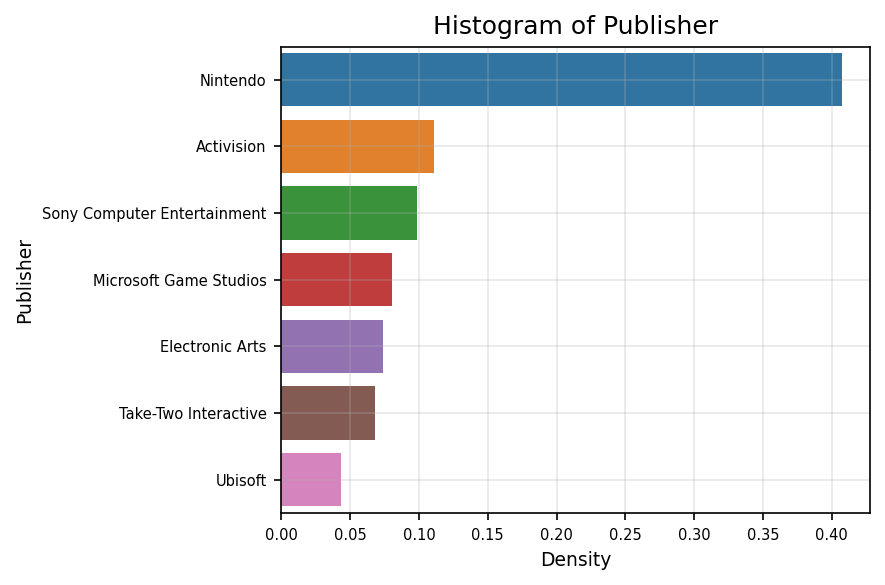

In [80]:
# 위 전처리에 의해서 80%의 백분위에 해당하는 publisher만 추려서 시장의 데이터를 비교
publisher_90 = len(cul_publisher_hist[cul_publisher_hist/cul_publisher_hist[-1] < 0.9])
plt.figure()
plt.gcf().set_dpi(150)
plt.title("Histogram of Publisher")
sns.barplot(x = (publisher_hist.values/publisher_hist.values.sum())[:publisher_90], y = publisher_hist.index[:publisher_90])
plt.xlabel("Density", fontsize = 9)
plt.ylabel("Publisher", fontsize = 9)
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 7)
plt.grid(alpha = 0.3)
plt.tight_layout()
plt.show()

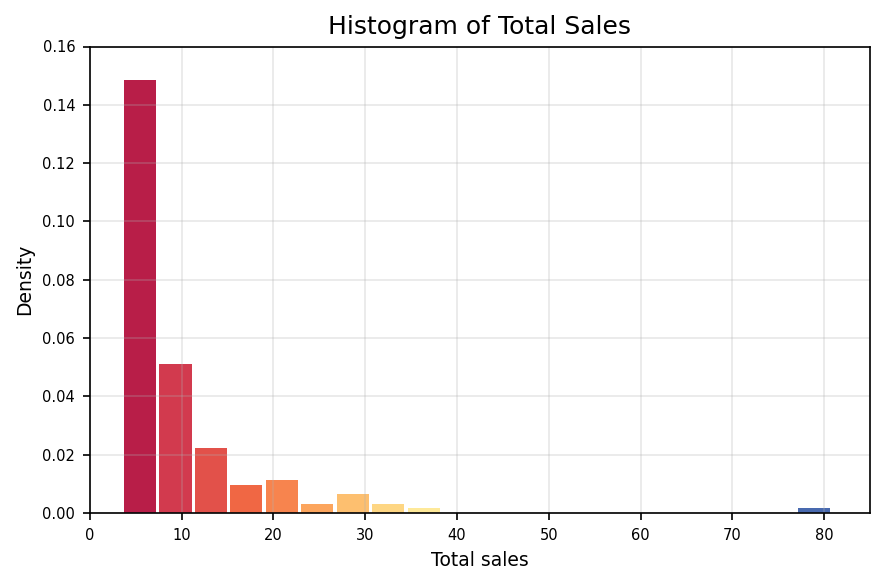

In [81]:
 hist, bins = np.histogram(data_high["Total_Sales"], bins = 20, density = True)
colormap = sns.color_palette("Spectral", len(bins[:-1])) # 위와 색을 일치시킴

# 액션의 히스토그램 분석 시각화
plt.figure()
plt.gcf().set_dpi(150)
plt.title("Histogram of Total Sales")
plt.bar(bins[:-1], hist, width = 3.5, color = colormap)
plt.xlabel("Total sales", fontsize = 9)
plt.ylabel("Density", fontsize = 9)
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 7)
plt.xlim(0, 85)
plt.ylim(0, 0.16)
plt.grid(alpha = 0.3)
plt.tight_layout()
plt.show()

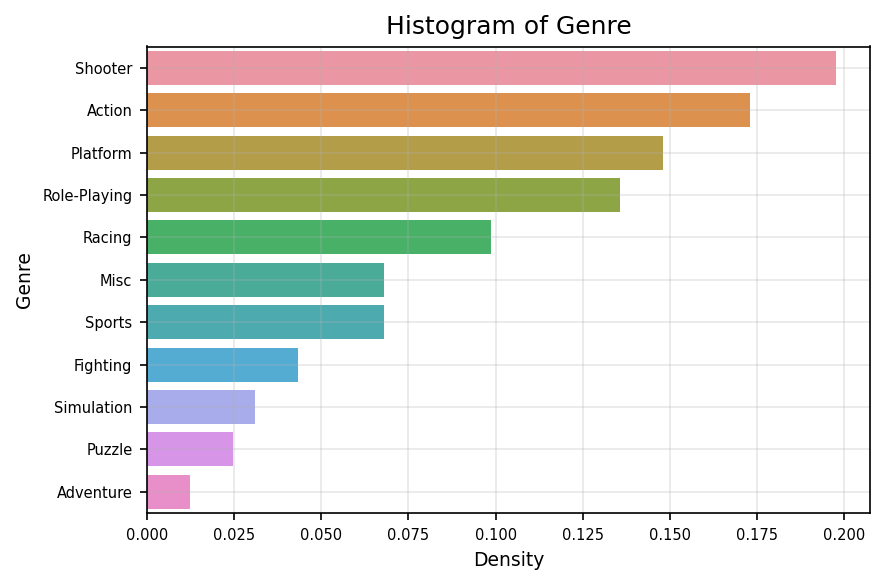

In [82]:
# 데이터에서 platform의 분포를 확인
Genre_hist = data_high["Genre"].value_counts().sort_values(ascending=False)

# 데이터 시각화
plt.figure()
plt.gcf().set_dpi(150)
plt.title("Histogram of Genre")
sns.barplot(x = Genre_hist.values/Genre_hist.sum(), y = Genre_hist.index)
plt.xlabel("Density", fontsize = 9)
plt.ylabel("Genre", fontsize = 9)
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 7)
plt.grid(alpha = 0.3)
plt.tight_layout()
plt.show()